https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Importing Dependencies 

In [1]:
#!pip install --upgrade nbformat
#!pip install --upgrade nbconvert


In [2]:
#pip install seaborn

In [3]:
#pip install scikit-learn

In [4]:
#pip install -U imbalanced-learn


In [5]:
import pandas as pd   #for handling dataset
import  numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting data 
import seaborn as sns # for plotting library
from sklearn.model_selection import StratifiedShuffleSplit # for stratified splitting
from imblearn.over_sampling import SMOTE # for performing SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve


In [6]:
pd.set_option('display.max_columns', None)


# functions

In [7]:
def find_duplicate_columns(df):
    duplicate_columns = []
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            other_col = df.iloc[:, y]
            if col.equals(other_col):
                duplicate_columns.append(df.columns.values[y])
    return duplicate_columns

In [8]:
def categorize_amount(amount):
    if amount <= 2500:
        return '0-2500'
    else:
        return '2500-above'

# loading the main data file

In [9]:
creditcard_df = pd.read_csv('creditcard.csv')

# EDA

In [10]:
creditcard_df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [11]:
creditcard_df.shape

(284807, 31)

In [12]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
21503    31711.0  0.912254 -0.211692  0.160843  1.294325 -0.017175  0.384430   
27704    34666.0 -1.130563  0.068934  2.548489 -0.334199  0.200648 -0.311135   
264855  161625.0  0.004804  1.013762  1.220124  1.205317 -0.432583  0.450756   
144528   86190.0 -1.580995  1.167677  0.744412 -0.326570  0.541087  0.925209   
227640  145152.0  2.211070 -1.895325 -0.385273 -1.632751 -1.669097  0.386140   

              V7        V8        V9       V10       V11       V12       V13  \
21503   0.141553  0.102195 -0.012585 -0.021638  0.928785  1.297806  0.207295   
27704  -0.146992  0.270945  0.414093 -1.000785 -1.502787 -0.291672 -0.527085   
264855 -1.105143 -2.614926 -0.337604 -0.814442 -0.757316  0.863699  0.722132   
144528  0.520655  0.764773 -0.206466 -0.605776 -0.656486 -0.227455 -1.651268   
227640 -1.962571  0.245930 -0.255498  1.494854 -2.011607 -1.871668 -1.039565   

             V14       V15       V16       V17       V18       V19       V20  \
21503   0.201485 -0.792967 -0.431145 -0.122662 -0.393145  0.004785  0.099138   
27704  -0.468627 -0.344771  0.515888 -0.578051  0.082107 -0.461534  0.001639   
264855  0.318109  0.734312  0.081570 -0.185400 -0.160025  0.130734  0.660823   
144528  0.535783 -1.266617  0.302925 -0.554786  0.222171 -0.361353 -0.285529   
227640 -0.618498  0.418558  0.157309  0.204379  0.671480 -0.125422 -0.420092   

             V21       V22       V23       V24       V25       V26       V27  \
21503   0.005322 -0.039901 -0.225439 -0.271825  0.644310 -0.323916  0.015090   
27704  -0.041538 -0.199315 -0.243305 -0.107257  0.352043  0.245961  0.008128   
264855 -1.446259 -0.010289  0.026640 -0.053401  0.624347 -0.653311  0.166353   
144528 -0.093276 -0.335362 -0.484701 -1.352373  0.866938 -0.374562 -0.094447   
227640 -0.189752 -0.175084  0.293691 -0.053494 -0.523552 -0.230686  0.045788   

             V28  Amount  Class  
21503   0.024271  129.00      0  
27704   0.070399    4.99      0  
264855  0.264770    1.25      0  
144528  0.014415   51.54      0  
227640 -0.027890   50.00      0

In [13]:
find_duplicate_columns(creditcard_df)

[]

There is no duplicate columns

In [14]:
sset = ['Amount', 'Class']

In [15]:
creditcard_df[sset].describe()

Amount          Class
count  284807.000000  284807.000000
mean       88.349619       0.001727
std       250.120109       0.041527
min         0.000000       0.000000
25%         5.600000       0.000000
50%        22.000000       0.000000
75%        77.165000       0.000000
max     25691.160000       1.000000

plotting 

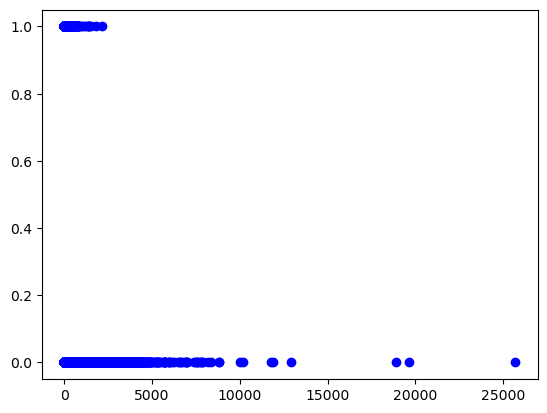

In [16]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

# Show the plot
plt.show()

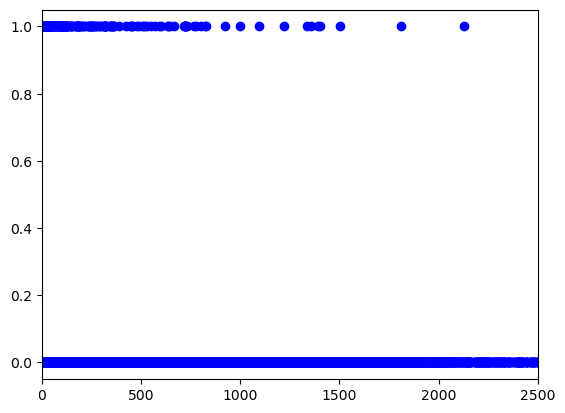

In [17]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

plt.xlim(0,2500)

# Show the plot
plt.show()

Fruad transanction is below the amount of 2500

<Axes: >

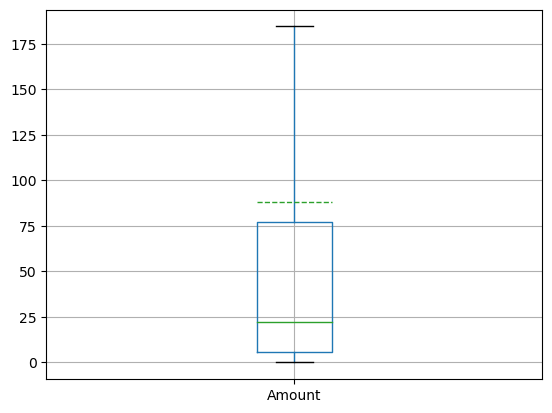

In [18]:
creditcard_df[['Amount']].boxplot(showfliers=False, meanline=True, showmeans=True)


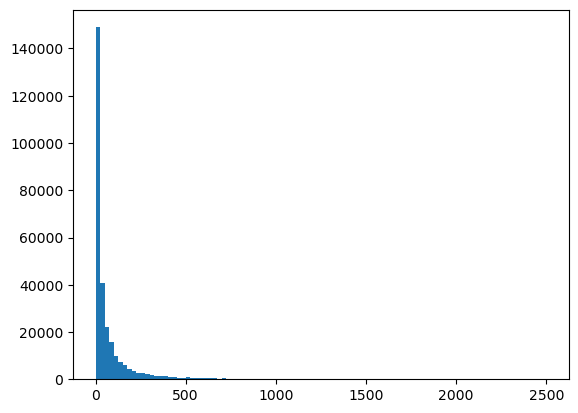

In [19]:
plt.hist(creditcard_df['Amount'], bins= 100, range = (0, 2500))
plt.show()

<Axes: >

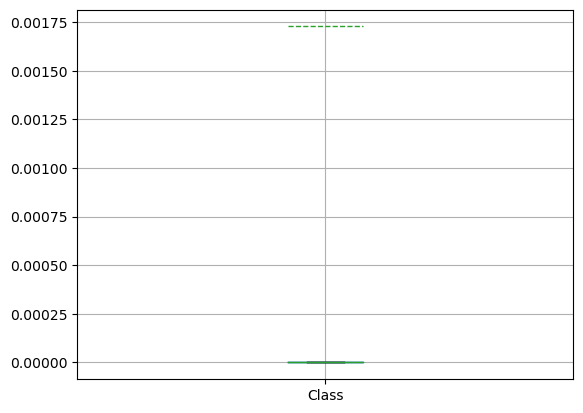

In [20]:
creditcard_df[['Class']].boxplot(showfliers=False, meanline=True, showmeans=True)

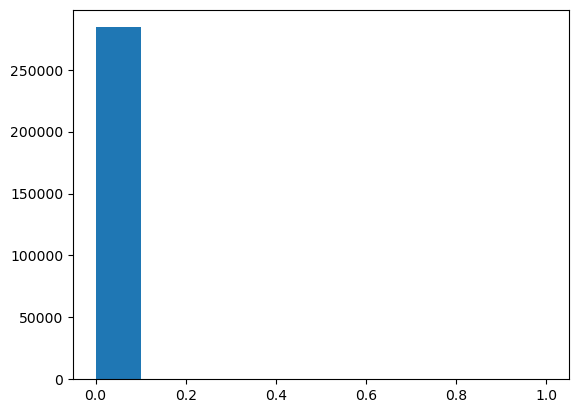

In [21]:
plt.hist(creditcard_df['Class'])
plt.show()

In [22]:
creditcard_df['Class'].sum(axis =0)

492

Hihgly imbalanced data 

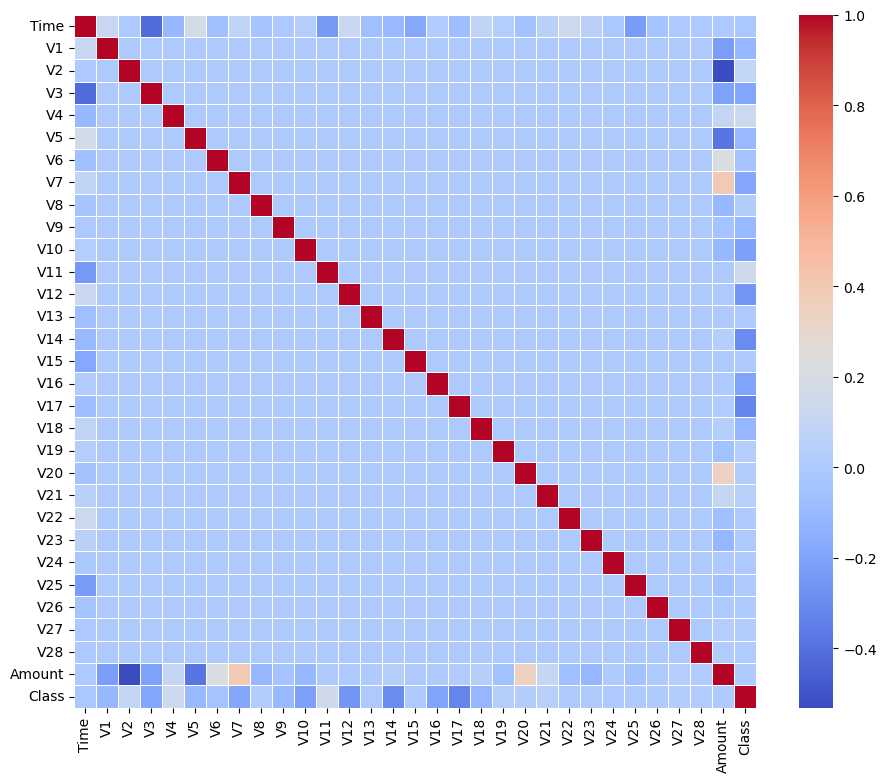

In [23]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr = creditcard_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

most of the columns are uncorrelated so we will use all of them for Supervised Machine Learning and for the purpose of feature Selection we are not merging the same columns

***Group by anaylsis***

*class*

In [24]:
grouped_class_df = creditcard_df.groupby('Class')

In [25]:
grouped_class_df.describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1                                          \
            75%       max     count      mean       std       min       25%   
Class                                                                         
0      139333.0  172792.0  284315.0  0.008258  1.929814 -56.40751 -0.917544   
1      128483.0  170348.0     492.0 -4.771948  6.783687 -30.55238 -6.036063   

                                           V2                                 \
            50%       75%       max     count      mean       std        min   
Class                                                                          
0      0.020023  1.316218  2.454930  284315.0 -0.006271  1.636146 -72.715728   
1     -2.342497 -0.419200  2.132386     492.0  3.623778  4.291216  -8.402154   

                                                      V3                      \
            25%       50%       75%        max     count      mean       std   
Class                                                                          
0     -0.599473  0.064070  0.800446  18.902453  284315.0  0.012171  1.459429   
1      1.188226  2.717869  4.971257  22.057729     492.0 -7.033281  7.110937   

                                                                V4            \
             min       25%       50%       75%       max     count      mean   
Class                                                                          
0     -48.325589 -0.884541  0.182158  1.028372  9.382558  284315.0 -0.007860   
1     -31.103685 -8.643489 -5.075257 -2.276185  2.250210     492.0  4.542029   

                                                                          V5  \
            std       min       25%       50%       75%        max     count   
Class                                                                          
0      1.399333 -5.683171 -0.850077 -0.022405  0.737624  16.875344  284315.0   
1      2.873318 -1.313275  2.373050  4.177147  6.348729  12.114672     492.0   

                                                                     \
           mean       std         min       25%       50%       75%   
Class                                                                 
0      0.005453  1.356952 -113.743307 -0.689398 -0.053457  0.612181   
1     -3.151225  5.372468  -22.105532 -4.792835 -1.522962  0.214562   

                        V6                                                     \
             max     count      mean       std        min       25%       50%   
Class                                                                           
0      34.801666  284315.0  0.002419  1.329913 -26.160506 -0.766847 -0.273123   
1      11.095089     492.0 -1.397737  1.858124  -6.406267 -2.501511 -1.424616   

                                  V7                                           \
            75%        max     count      mean       std        min       25%   
Class                                                                           
0      0.399619  73.301626  284315.0  0.009637  1.178812 -31.764946 -0.551442   
1     -0.413216   6.474115     492.0 -5.568731  7.206773 -43.557242 -7.965295   

                                             V8                      \
            50%       75%         max     count      mean       std   
Class                                                                 
0      0.041138  0.571019  120.589494  284315.0 -0.000987  1.161283   
1     -3.034402 -0.945954    5.802537     492.0  0.570636  6.797831   

                                                                 V9            \
             min       25%       50%       75

In [26]:
grouped_class_df.size()

Class
0    284315
1       492
dtype: int64

In [27]:
grouped_class1_df = grouped_class_df.get_group(1)

In [28]:
grouped_class1_df.sample(3)

Time         V1         V2         V3         V4         V5  \
45203  42247.0  -2.524012   2.098152  -4.946075   6.456588   3.173921   
10897  18690.0 -15.398845   7.472324 -19.026912  11.165526  -6.893856   
15204  26556.0 -19.179826  11.817922 -21.919174   6.086236 -14.708845   

             V6         V7         V8        V9        V10        V11  \
45203 -3.058806  -0.184710  -0.390420 -3.649812  -4.077585   4.389214   
10897 -2.120937 -14.913330  -0.721214 -7.175097 -14.166795  10.277769   
15204 -4.308888 -15.357952  12.857165 -3.999861  -8.928656   5.849293   

             V12       V13        V14       V15       V16        V17  \
45203  -5.849558 -0.750964 -11.583898  0.838750 -1.461029   0.635694   
10897 -14.985434  0.345179 -14.666389 -0.346353 -8.333242 -12.602596   
15204  -8.261650  0.153829  -8.829359  0.008879 -7.070953 -13.629721   

            V18       V19       V20       V21       V22       V23       V24  \
45203  0.390150 -1.063028 -0.162797  0.027935  0.220366  0.976348 -0.290539   
10897 -4.876683  0.604626  1.111502 -2.444884  0.727495 -0.345078 -0.981749   
15204 -4.958830  1.272091  1.572950  1.746802 -1.353149 -0.762965  0.117028   

            V25       V26       V27       V28  Amount  Class  
45203  1.161002  0.663954  0.456023 -0.405682    1.00      1  
10897  0.995271  0.816762  2.262942 -1.178063    1.00      1  
15204  1.297994 -0.224825  1.621052  0.484614   99.99      1

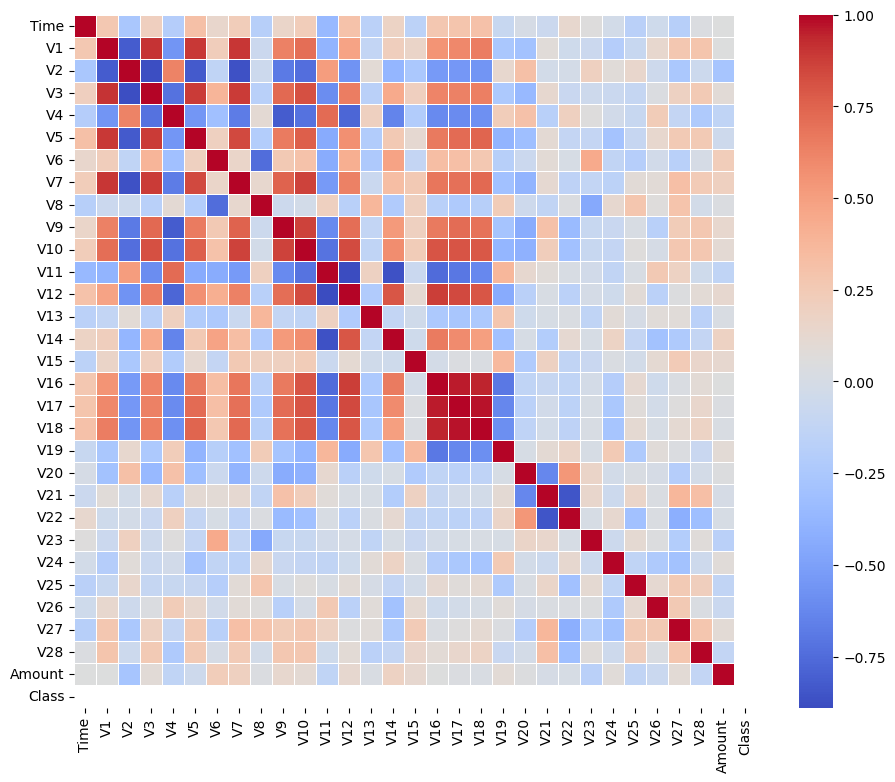

In [29]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class1_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

There are certain varibles for eg. V1 and V3 are highly correlated for fraudulent transaction

In [30]:
grouped_class0_df = grouped_class_df.get_group(0)

In [31]:
grouped_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
90127    62873.0  0.925269  0.277297  0.359685  2.794218  0.020328  0.488582   
200295  133380.0  1.968326 -0.142875 -1.099329  0.642267 -0.122941 -1.118957   
75259    55972.0  1.262842  1.187528 -1.923626  1.342786  1.246010 -1.047270   
154456  101615.0  0.018111  0.143581  0.826591 -1.907868 -0.433345 -0.926804   
177750  123326.0 -0.790036  0.810755  0.854912 -1.402586  0.624676 -1.331959   

              V7        V8        V9       V10       V11       V12       V13  \
90127  -0.105925  0.270867 -0.458710  0.162931  1.177364  0.546145 -0.626121   
200295  0.283538 -0.356915  0.514648  0.044573 -0.763852  0.683447  0.413133   
75259   0.616627 -0.154017 -0.562666 -1.363241  1.682368 -0.371136 -0.653816   
154456  0.464675 -0.307063  2.485020 -1.881064  0.301239 -1.637115  2.789396   
177750  1.509183 -0.230283 -0.335946 -1.194100 -1.126484 -1.076864 -1.965959   

             V14       V15       V16       V17       V18       V19       V20  \
90127  -1.004300 -1.182810  0.387267  0.769767  0.076803 -0.872145 -0.042154   
200295  0.165041 -0.252573 -0.252626 -0.241852 -0.902001  0.130190 -0.126674   
75259  -3.116913  0.494103  1.500168  2.189039  2.168895 -0.232743 -0.035800   
154456  1.215593  0.427202 -0.554109  0.281037  0.718196  0.535563  0.090818   
177750  0.818251  0.292192  0.049258 -0.537273 -0.264604 -0.398463 -0.168631   

             V21       V22       V23       V24       V25       V26       V27  \
90127  -0.023405 -0.044637 -0.138466 -0.058411  0.485507  0.083839  0.019063   
200295 -0.237344 -0.587451  0.259375  0.058537 -0.202693  0.052321 -0.061910   
75259  -0.219795 -0.592129 -0.316088 -0.837673  0.918383 -0.258449  0.031320   
154456  0.278439  1.208139  0.120947  0.061414 -1.046369 -0.289494  0.251060   
177750 -0.149427 -0.680416 -0.314903 -0.087081  0.758301 -0.111057 -0.072265   

             V28  Amount  Class  
90127   0.043111   75.31      0  
200295 -0.050490   44.99      0  
75259   0.077145    0.89      0  
154456  0.259861   75.99      0  
177750  0.035049   40.00      0

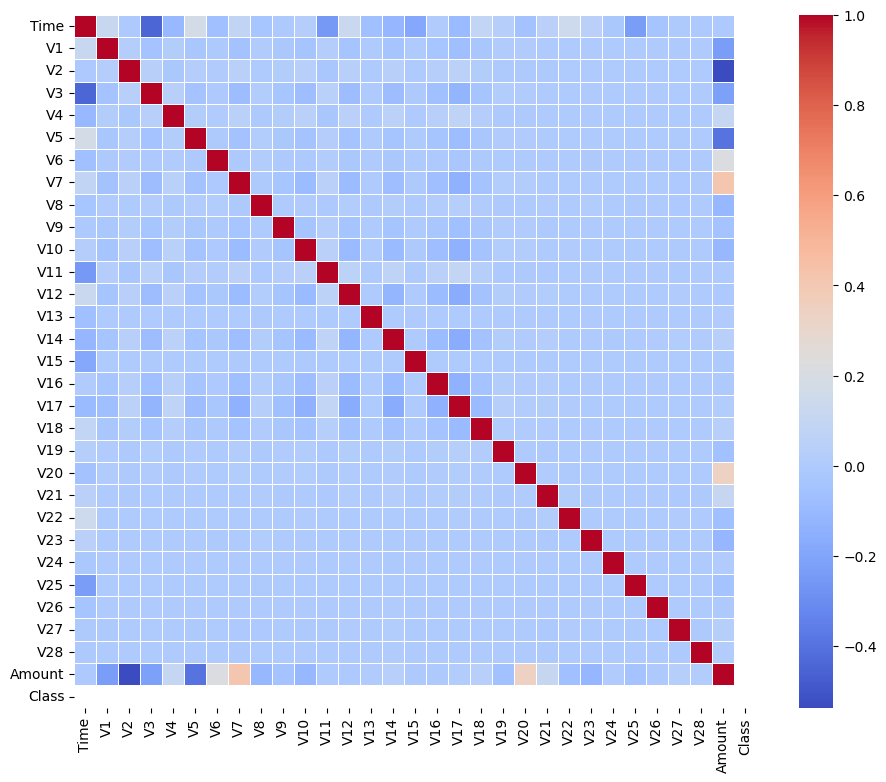

In [32]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class0_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

For the observation purpose we can observe that in case of both fraudulent and non fraudulent transactions the variables from V1 to V17 are correlated 

*Amount*

In [33]:
creditcard_df['Amount_Group'] = creditcard_df['Amount'].apply(categorize_amount)

In [34]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
193792  130290.0 -5.287553 -4.036986 -2.057586 -0.614065  0.745152  0.569144   
168553  119277.0  1.530778 -1.111765 -1.246173  0.407479 -0.362174 -0.432624   
184974  126475.0 -8.858495 -3.727622 -1.592163  5.966887 -1.893147  3.137388   
87225    61589.0  1.175991 -0.353168  0.592868  0.150351 -0.957193 -0.587255   
157667  110234.0 -0.718012  0.684810  0.852291 -1.298147  2.608641  4.202201   

              V7        V8        V9       V10       V11       V12       V13  \
193792  0.475425 -0.101072 -0.162946  0.973522  0.381660 -0.133561 -0.823717   
168553  0.204098 -0.307189  0.726000 -0.123618 -1.241868  0.766310  1.455698   
184974  2.065647  0.282164  0.928882  3.759154 -0.374591 -0.060032  0.357221   
87225  -0.370605  0.074879  0.713782 -0.158875  0.946128  0.507182 -1.547139   
157667 -0.123640  0.767626  1.497087 -0.900018  1.038070 -2.602292  1.489569   

             V14       V15       V16       V17       V18       V19       V20  \
193792  0.469997  0.542992 -1.555387 -0.052662  0.782807 -1.638323 -3.204612   
168553 -0.179788  0.272285  0.334991 -0.718433 -0.255095  0.080234  0.478031   
184974 -0.958422  1.306245 -0.463678  1.278871 -2.120384  0.692884 -2.143759   
87225   0.254983 -0.866257 -0.163870  0.093398 -0.117618  0.676818 -0.143970   
157667  1.377218  1.035699 -0.371210  0.197936  0.383145  0.423490  0.092681   

             V21       V22       V23       V24       V25       V26       V27  \
193792 -0.549584  0.888843 -1.156872 -1.450192 -0.573280 -0.128405 -0.697959   
168553  0.122766 -0.064151 -0.118332 -0.567103 -0.259425  0.544887 -0.102186   
184974 -1.895727 -0.904341 -1.306076 -0.836300  0.322480  0.265316 -0.251602   
87225  -0.057428 -0.052550 -0.042238  0.599827  0.334221  1.084982 -0.082013   
157667 -0.280980 -0.563066 -0.273458  0.597296  0.273145 -0.733056 -0.331786   

             V28  Amount  Class Amount_Group  
193792  1.415945  310.50      0       0-2500  
168553 -0.010472  291.36      0       0-2500  
184974  4.773118  682.72      0       0-2500  
87225  -0.008759   20.00      0       0-2500  
157667 -0.152029    2.12      0       0-2500

In [35]:
grouped_amount_df = creditcard_df.groupby('Amount_Group')

In [36]:
grouped_amount_df.size()

Amount_Group
0-2500        284367
2500-above       440
dtype: int64

In [37]:
grouped_amountlow_df = grouped_amount_df.get_group('0-2500') 

In [38]:
col = grouped_amountlow_df.columns

In [39]:
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Group'],
      dtype='object')

In [40]:
col1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

In [41]:
col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

In [42]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

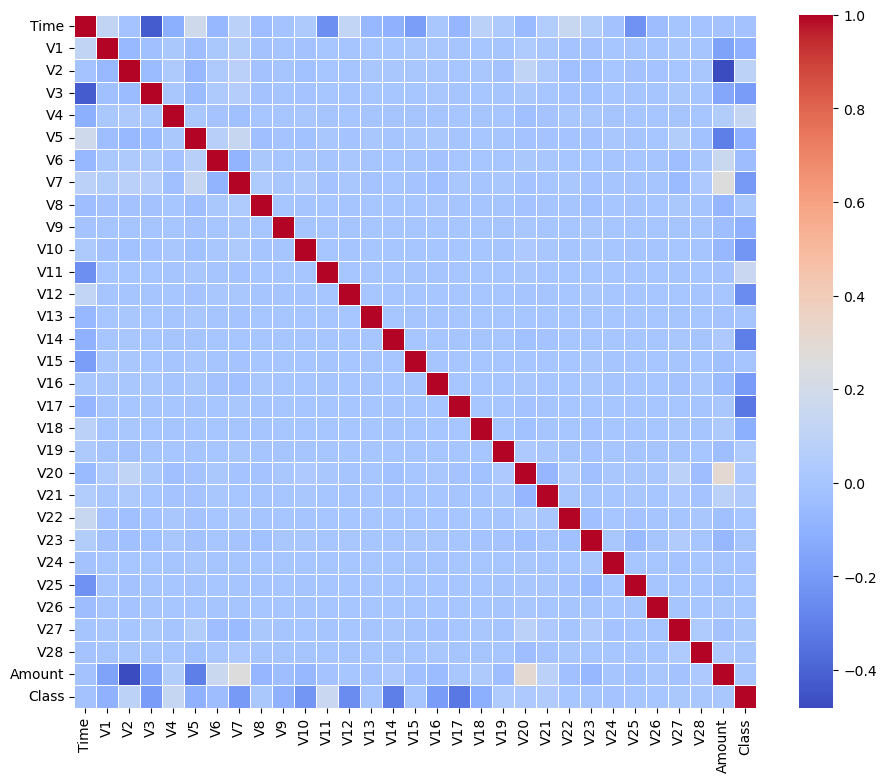

In [43]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_amountlow_df[col1].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


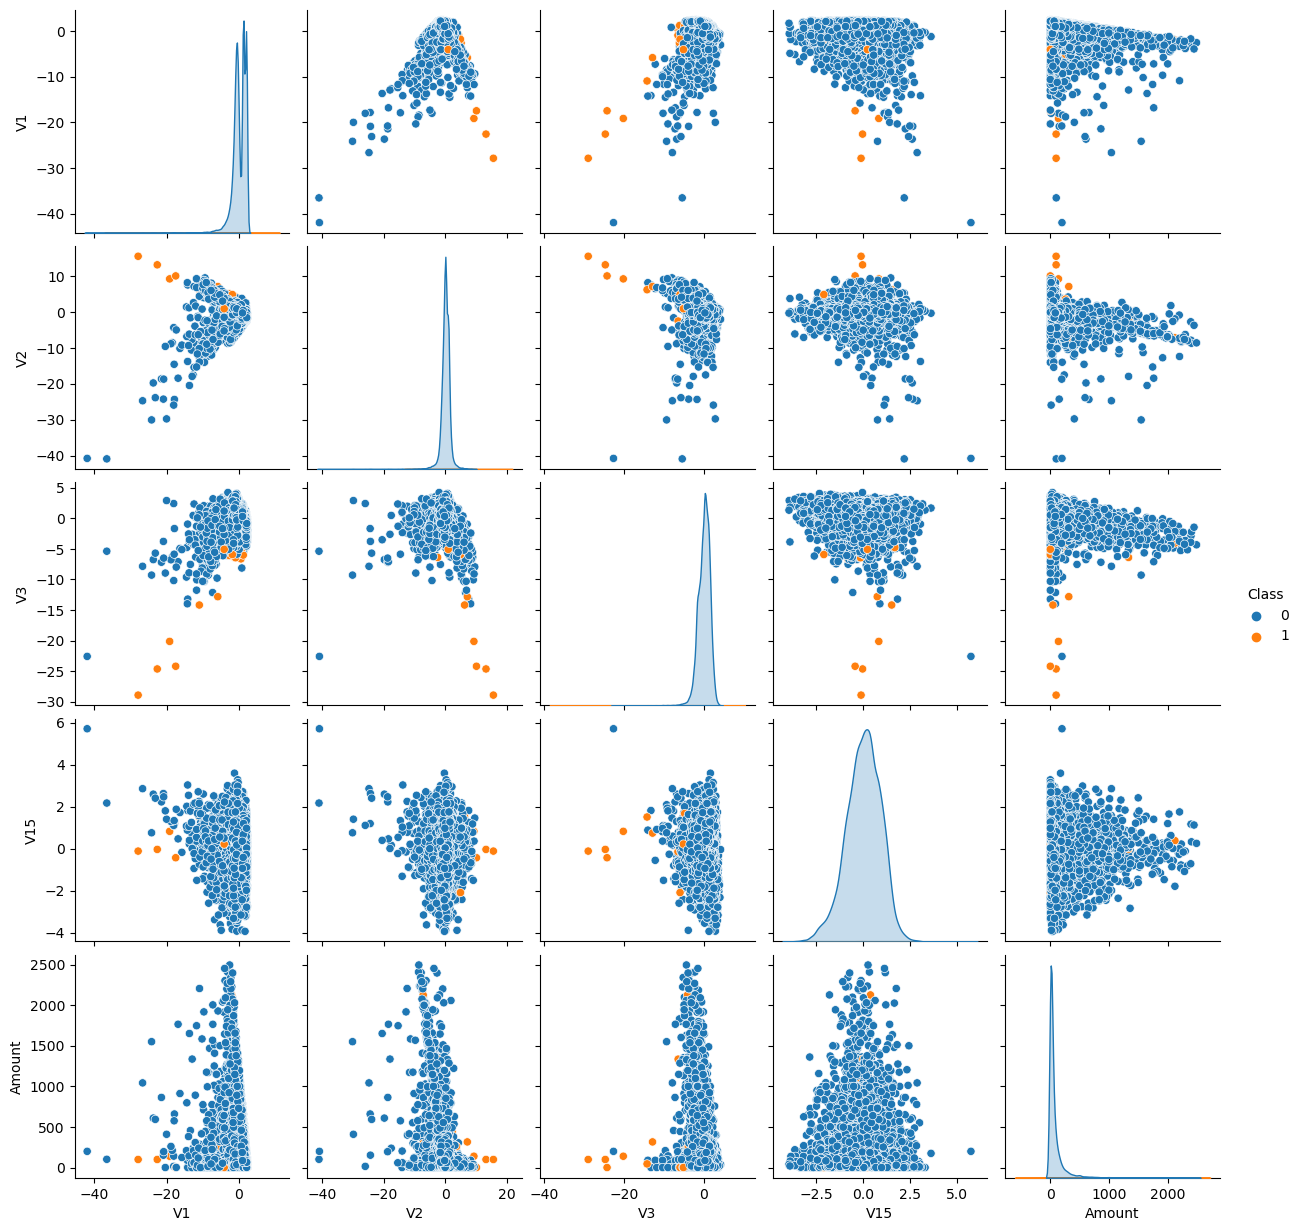

In [44]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.1), hue = 'Class')
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


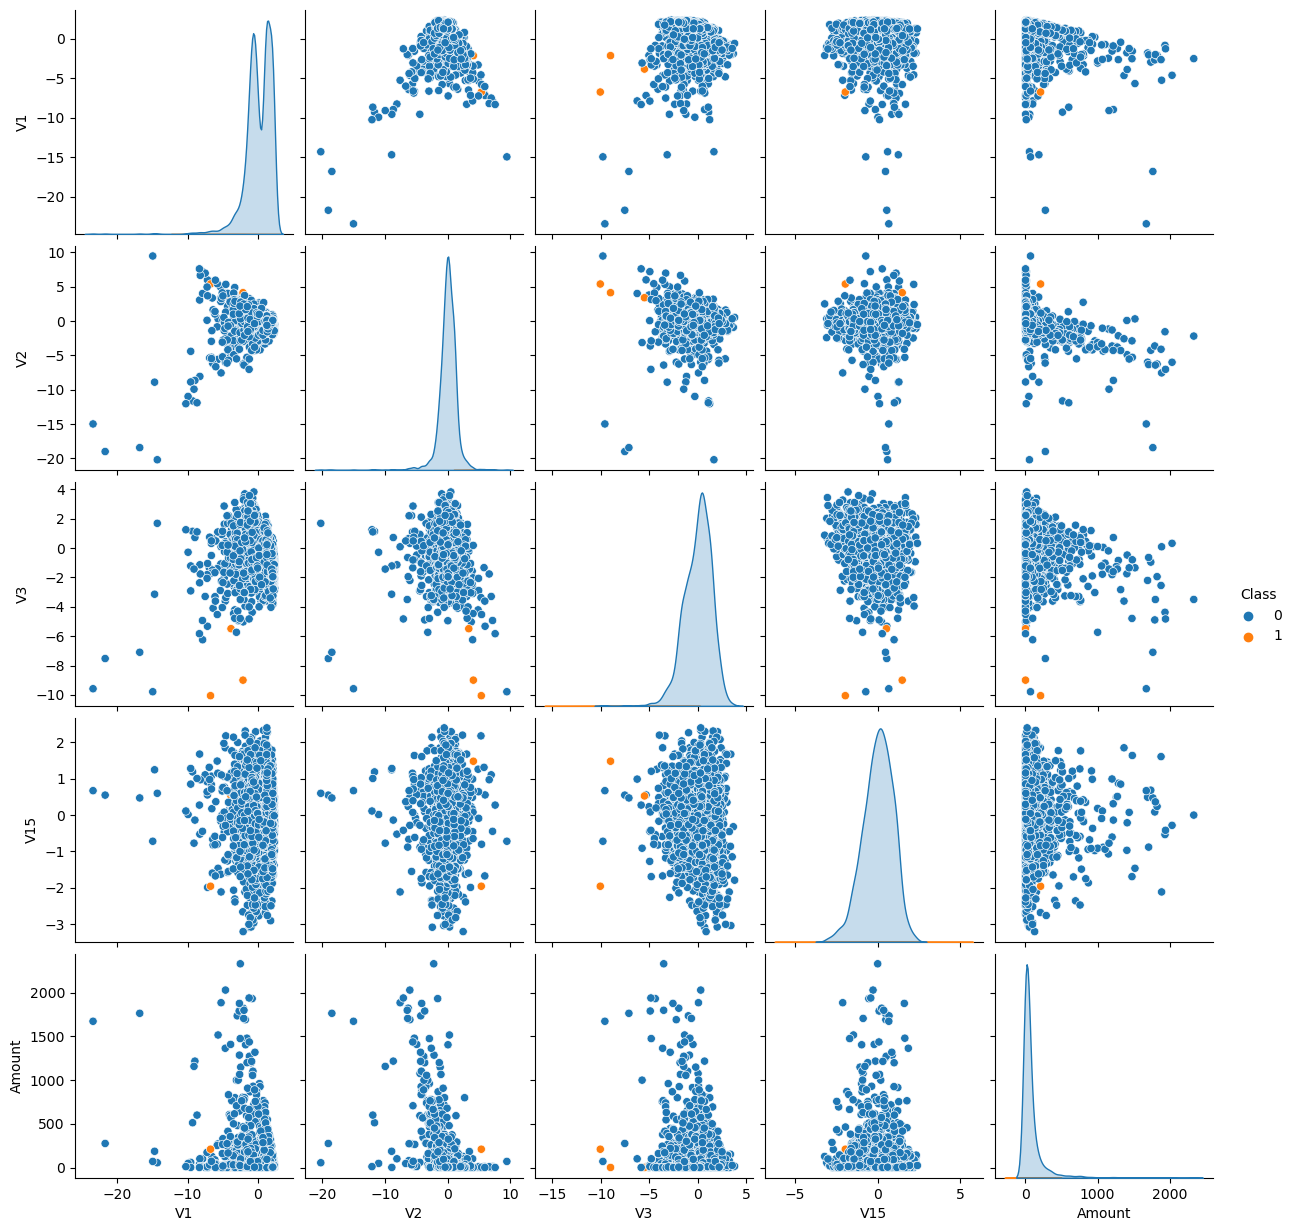

In [45]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.01), hue = 'Class')
plt.show()

In [46]:
col3 = ['V10', 'V12', 'V20', 'V27','Amount',
       'Class']


c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


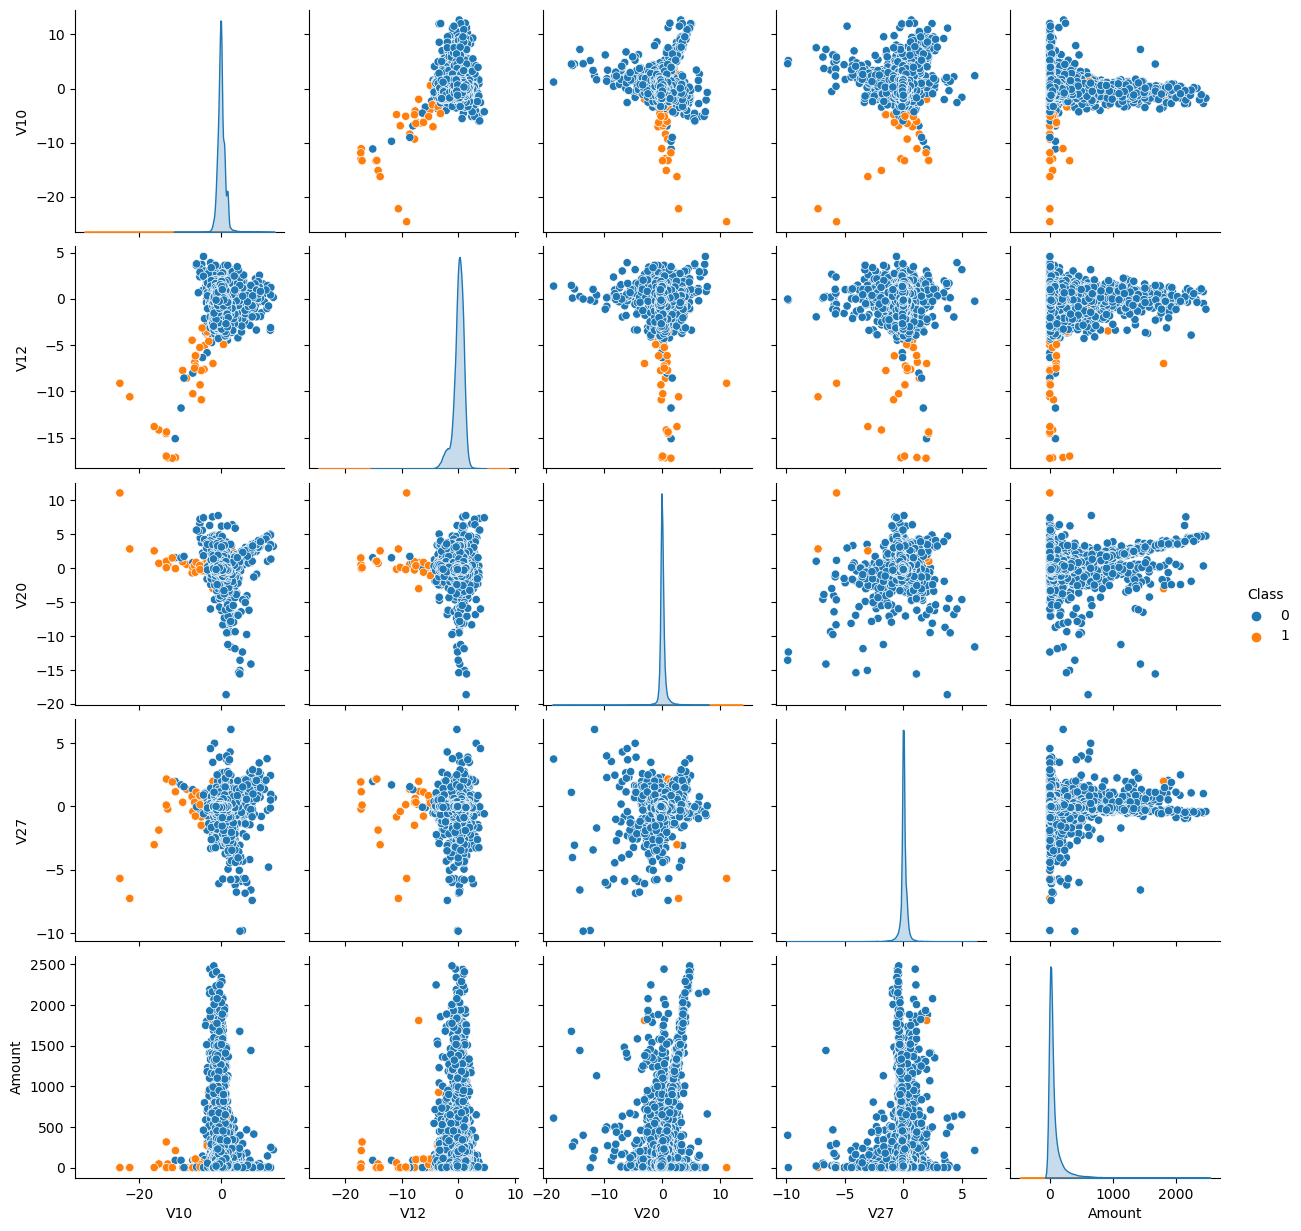

In [47]:
sns.pairplot(grouped_amountlow_df[col3].sample(frac = 0.1), hue = 'Class')
plt.show()

In [48]:
col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']


In [49]:
#sns.pairplot(grouped_amountlow_df[col4].sample(frac = 0.1), hue = 'Class')
#plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


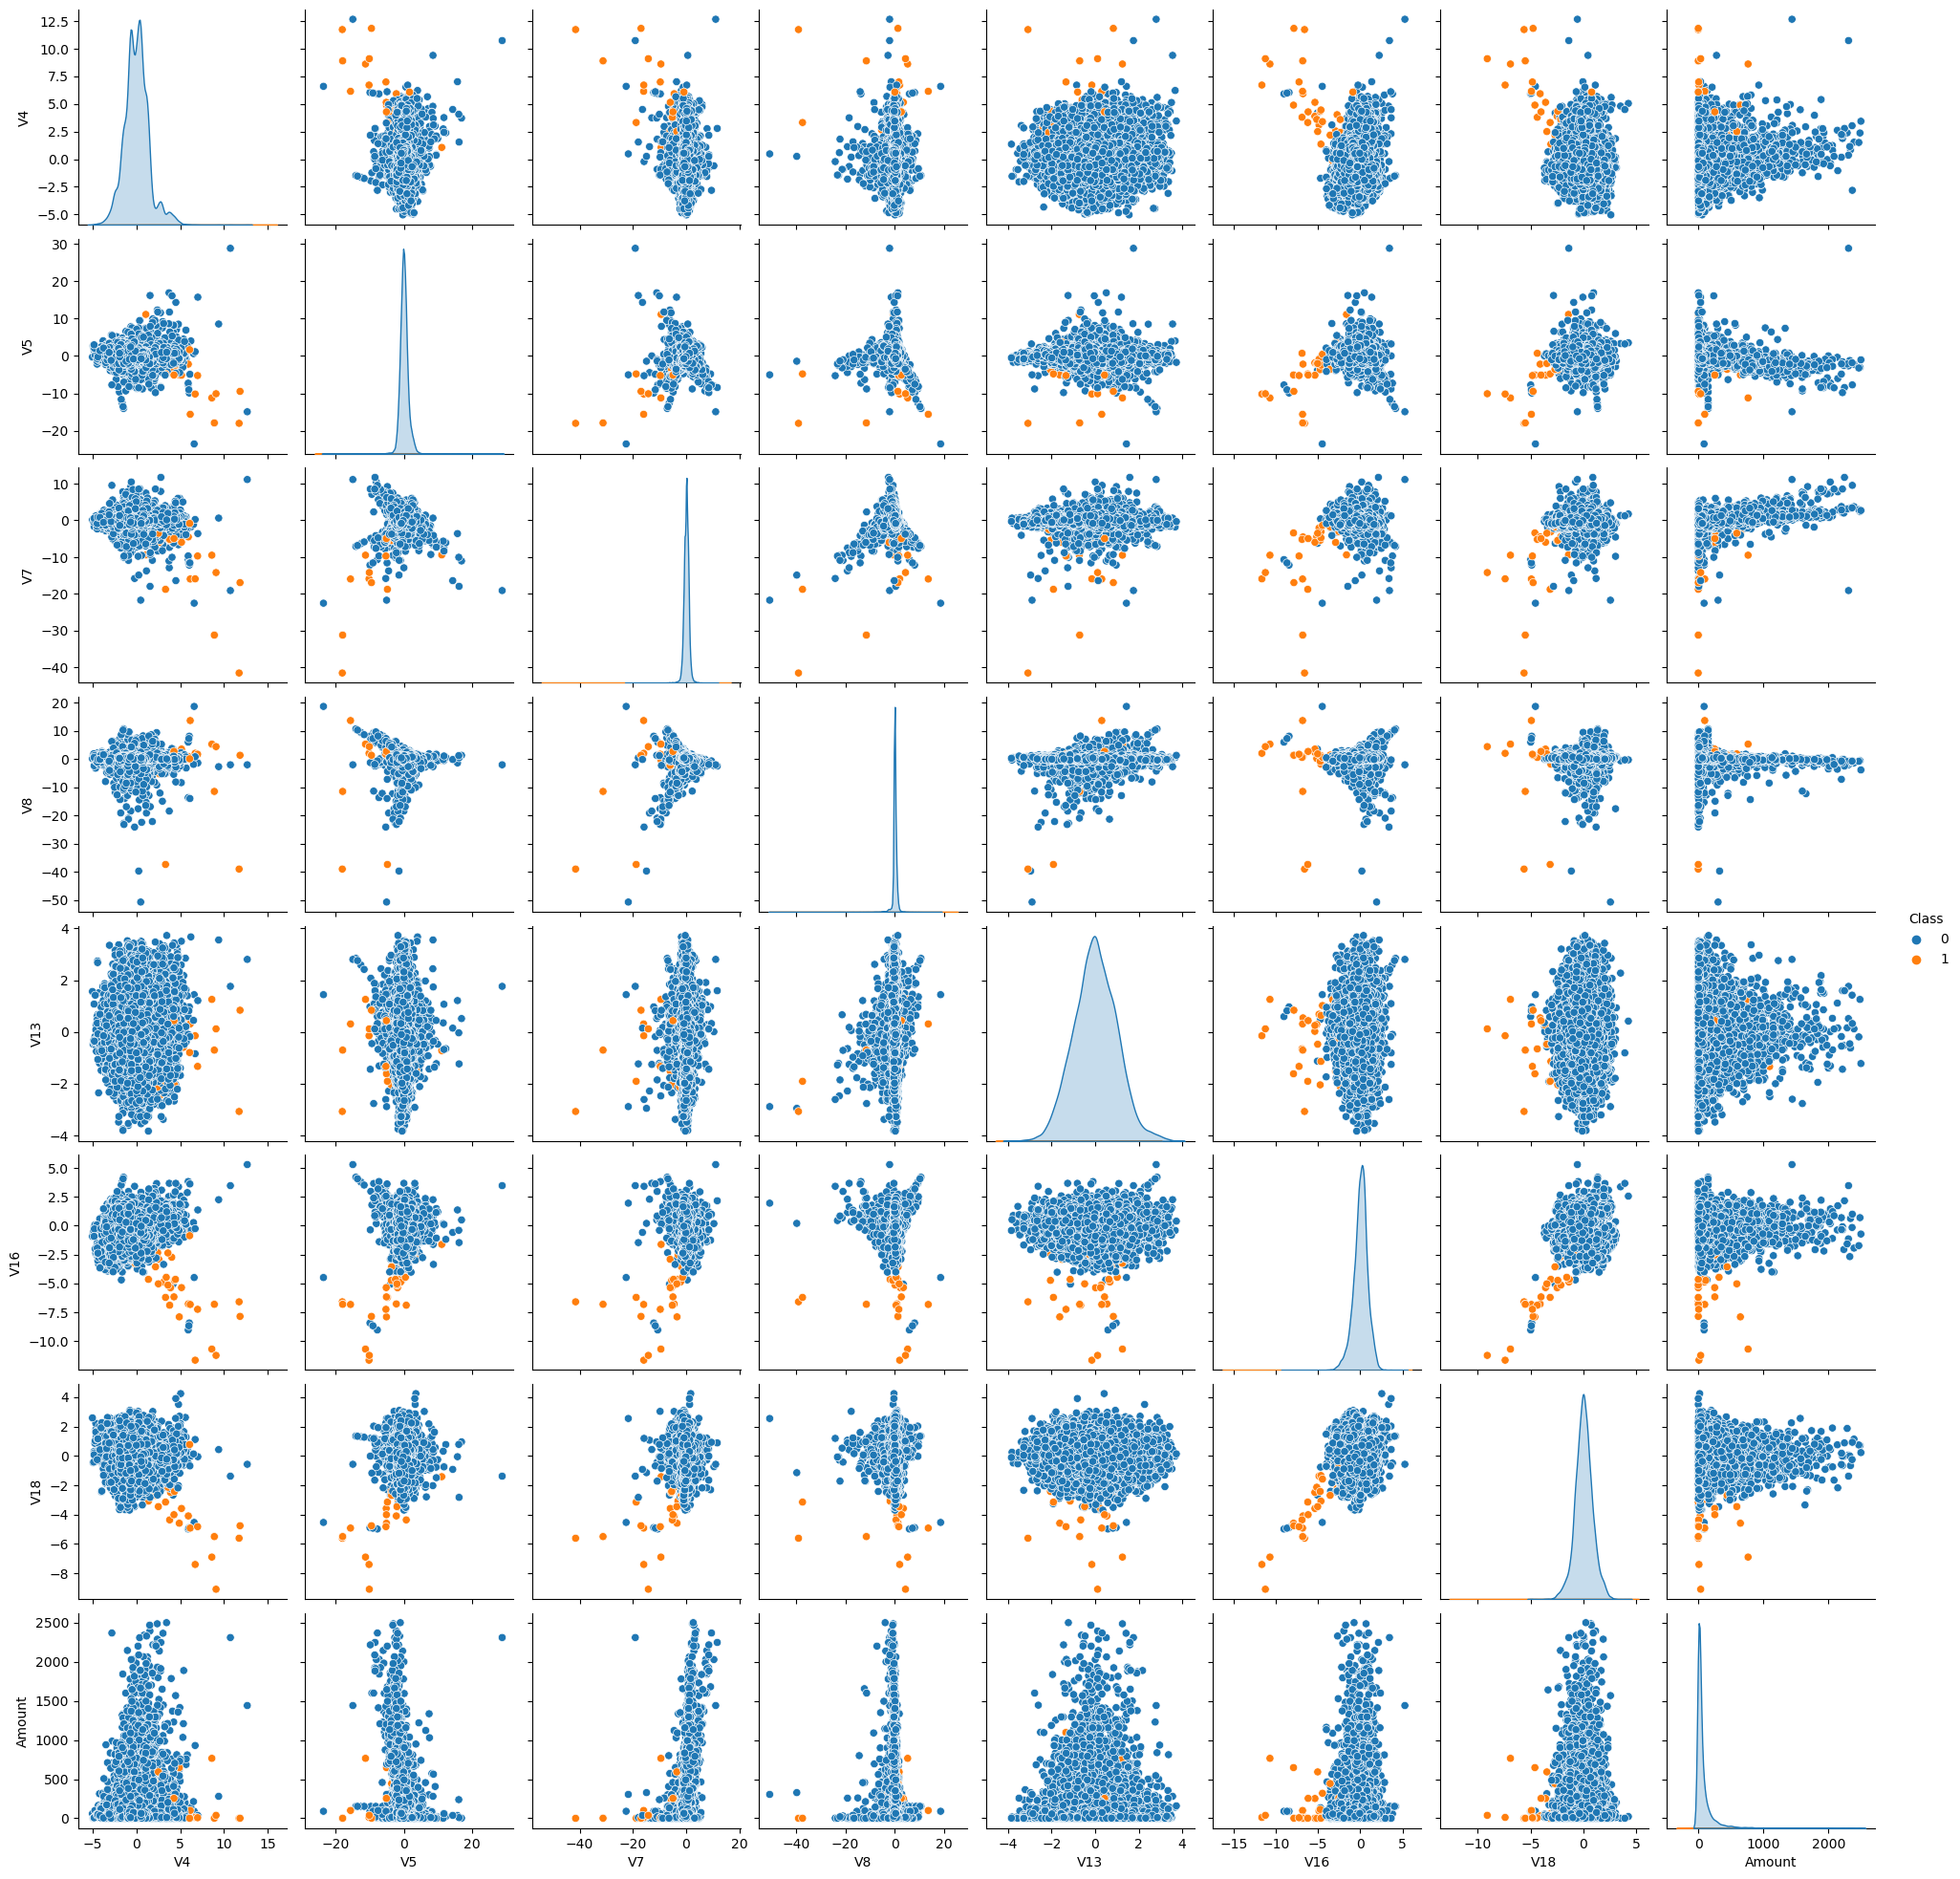

In [50]:
sns.pairplot(grouped_amountlow_df[col5].sample(frac = 0.1), hue = 'Class')
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


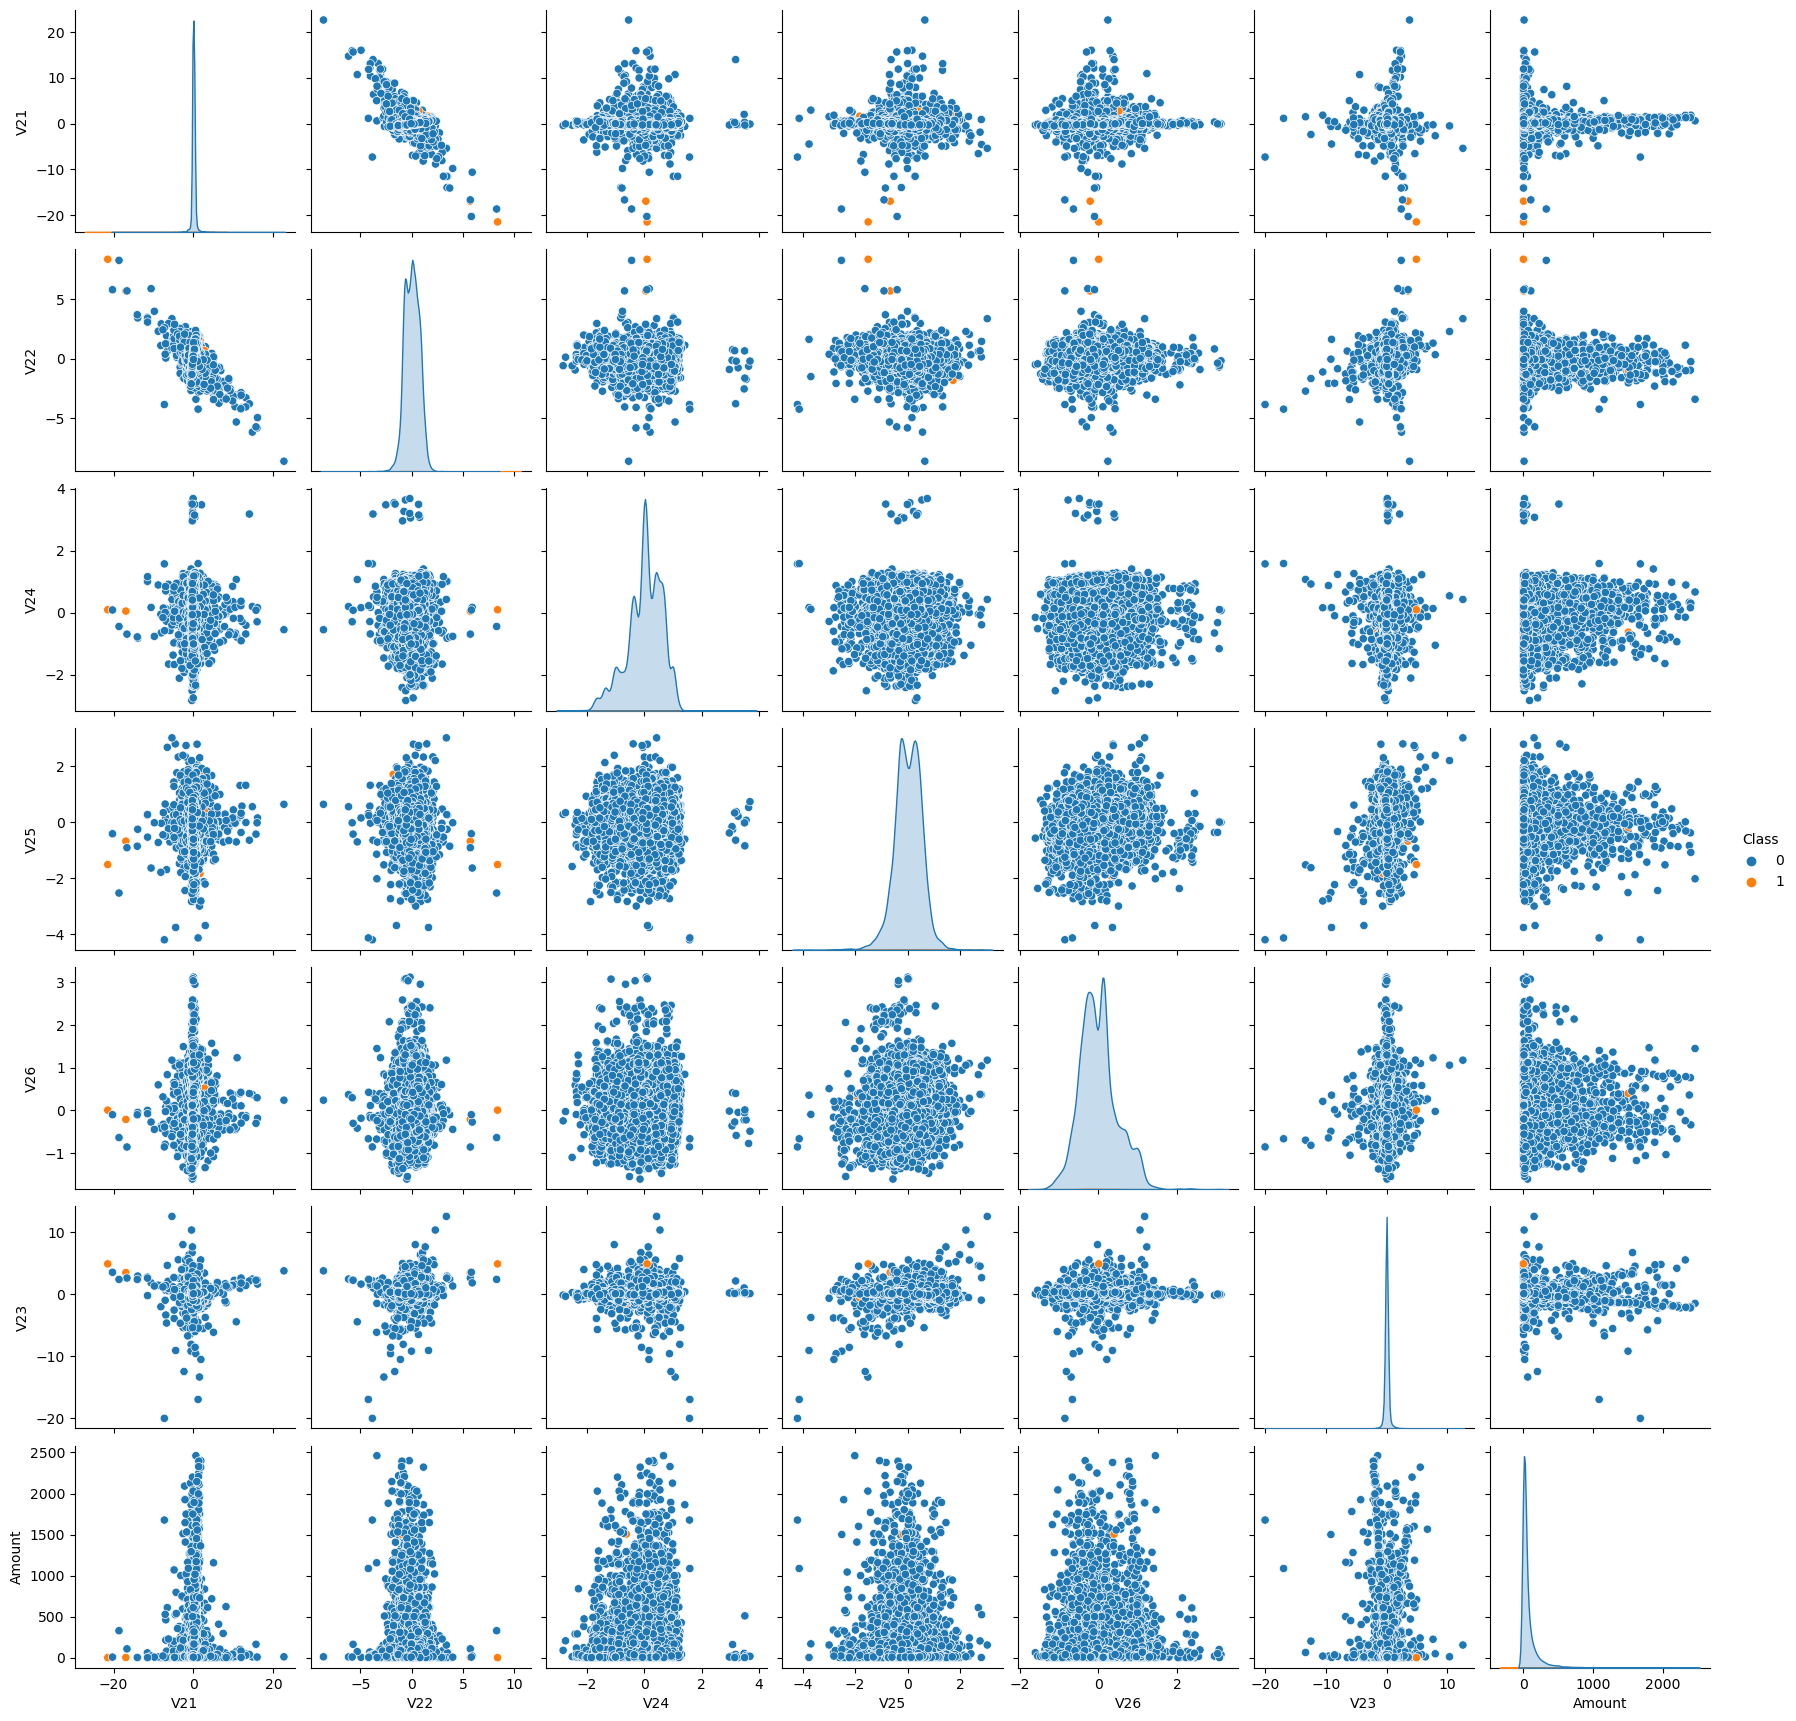

In [51]:
sns.pairplot(grouped_amountlow_df[col6].sample(frac = 0.1), hue = 'Class')
plt.show()

In [52]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

*two group*

In [53]:
grouped_amount_class_df = creditcard_df.groupby(['Amount_Group', 'Class'])

In [54]:
grouped_amount_class_df.size()

Amount_Group  Class
0-2500        0        283875
              1           492
2500-above    0           440
dtype: int64

In [55]:
grouped_amount_class_df.sample(3)

Time         V1         V2         V3        V4         V5  \
122289   76503.0   1.469492  -1.323049   1.078280 -1.185679  -1.981029   
235252  148316.0   1.957540  -0.291792  -0.368004  0.235993  -0.366800   
222610  143050.0   1.964234  -0.010001  -1.897805  0.365485   0.318965   
15451    26833.0 -20.532751  12.373989 -23.009003  6.144821 -15.587296   
233258  147501.0  -1.611877  -0.408410  -3.829762  6.249462  -3.360922   
151008   94362.0 -26.457745  16.497472 -30.177317  8.904157 -17.892600   
138474   82668.0  -4.984105   2.730725  -7.104205 -0.511333 -20.454913   
90220    62925.0  -2.975049  -2.024631  -1.987587  2.592173 -11.645018   
137503   82191.0  -4.033769  -9.693282  -1.885627  1.854479  -4.387951   

               V6         V7         V8        V9        V10       V11  \
122289  -0.158370  -1.582587   0.058267 -0.975971   1.257144 -1.246097   
235252  -0.019258  -0.576038   0.118431  0.918145  -0.016111  1.000577   
222610  -0.975665   0.182365  -0.206222  0.429293  -0.306283  0.915697   
15451   -4.384491 -15.939003  13.696416 -3.948455  -8.789723  5.612347   
233258   1.147964   1.858425   0.474858 -3.838399  -1.445375  2.113900   
151008  -1.227904 -31.197329 -11.438920 -9.462573 -22.187089  4.419997   
138474  11.038675  17.416779  -2.940716  0.122919  -1.280626  0.528930   
90220    7.260375  10.604394  -0.917506 -1.480746  -1.762093  0.437320   
137503   0.997215   2.427261  -0.472653 -0.376592  -0.667079  0.554106   

              V12       V13       V14       V15       V16        V17  \
122289  -0.884377  0.288764 -0.940317 -0.182764 -0.368157   0.610052   
235252   1.494707  0.600702  0.031960 -0.071572  0.377792  -0.837458   
222610   0.359079 -0.513445 -0.446757  0.285773  0.541406   0.033851   
15451   -7.914422  0.307820 -8.328601 -0.006979 -6.824524 -13.316079   
233258  -3.259702 -0.315347 -1.808103 -0.741877 -2.986920  -4.815863   
151008 -10.592305 -0.703796 -3.926207 -2.400246 -6.809890 -12.462315   
138474  -1.291600 -0.192935 -0.200691  2.162751  2.204379  -0.270544   
90220   -1.573822 -1.248801  0.313555  0.783195  2.782114  -1.440271   
137503   0.621859 -0.145994  0.272166 -0.763172 -0.987939   0.256667   

             V18       V19       V20       V21       V22       V23       V24  \
122289  0.194060  0.054258 -0.331111 -0.266023 -0.211970  0.021348  0.020354   
235252  0.252628  0.209942 -0.158908 -0.127854 -0.252844  0.397293  0.733715   
222610  1.191860 -0.005416 -0.133441  0.240107  0.720005 -0.110319 -0.481931   
15451  -4.921612  1.188204  1.592754  1.754608 -1.466115 -0.856779  0.125777   
233258 -1.271655  1.701685  2.425677  1.245582  0.616383  2.251439 -0.066096   
151008 -5.501051 -0.567940  2.812241 -8.755698  3.460893  0.896538  0.254836   
138474 -1.348150 -0.026683 -7.147561 -2.454256  0.016617 -1.702776  0.965745   
90220   1.873856 -1.163704  0.272067  0.230024  0.782648  1.885652  0.010987   
137503  1.867040 -0.946094  5.065239  1.111536 -2.393606 -2.260912  0.487244   

             V25       V26       V27       V28   Amount  Class Amount_Group  
122289  0.287184 -0.173017  0.076411  0.029280    17.30      0       0-2500  
235252 -0.423380 -0.679567  0.031015 -0.032912     2.95      0       0-2500  
222610  0.243601 -0.099319 -0.017515 -0.039362    43.44      0       0-2500  
15451   1.402587 -0.223755  1.574249  0.469201    99.99      1       0-2500  
233258  0.538710  0.541325 -0.136243 -0.009852   996.27      1       0-2500  
151008 -0.738097 -0.966564 -7.263482 -1.324884     1.00      1       0-2500  
138474 -0.435913  0.865466  1.139088 -1.493148  3690.24      0   2500-above  
90220   0.210776  0.113618  0.850972 -0.681130  2682.28      0   2500-above  
137503 -1.036437  0.604320 -0.533755  0.486380  2755.71      0   2500-above

In [56]:
grouped_amountlow_class1_df = grouped_amount_class_df.get_group(('0-2500', 1))

In [57]:
grouped_amountlow_class1_df.describe()

Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9         V10  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123   -5.676883   
std      5.372468    1.858124    7.206773    6.797831    2.500896    4.897341   
min    -22.105532   -6.406267  -43.557242  -41.044261  -13.434066  -24.588262   
25%     -4.792835   -2.501511   -7.965295   -0.195336   -3.872383   -7.756698   
50%     -1.522962   -1.424616   -3.034402    0.621508   -2.208768   -4.578825   
75%      0.214562   -0.413216   -0.945954    1.764879   -0.787850   -2.614184   
max     11.095089    6.474115    5.802537   20.007208    3.353525    4.031435   

              V11         V12         V13         V14         V15         V16  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     3.800173   -6.259393   -0.109334   -6.971723   -0.092929   -4.139946   
std      2.678605    4.654458    1.104518    4.278940    1.049915    3.865035   
min     -1.702228  -18.683715   -3.127795  -19.214325   -4.498945  -14.129855   
25%      1.973397   -8.688177   -0.979117   -9.692723   -0.643539   -6.562915   
50%      3.586218   -5.502530   -0.065566   -6.729720   -0.057227   -3.549795   
75%      5.307078   -2.974088    0.672964   -4.282821    0.609189   -1.226043   
max     12.018913    1.375941    2.815440    3.442422    2.471358    3.139656   

              V17         V18         V19         V20         V21         V22  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -6.665836   -2.246308    0.680659    0.372319    0.713588    0.014049   
std      6.970618    2.899366    1.539853    1.346635    3.869304    1.494602   
min    -25.162799   -9.498746   -3.681904   -4.128186  -22.797604   -8.887017   
25%    -11.945057   -4.664576   -0.299423   -0.171760    0.041787   -0.533764   
50%     -5.302949   -1.664346    0.646807    0.284693    0.592146    0.048434   
75%     -1.341940    0.091772    1.649318    0.822445    1.244611    0.617474   
max      6.739384    3.790316    5.228342   11.059004   27.202839    8.361985   

              V23         V24         V25         V26         V27         V28  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -0.040308   -0.105130    0.041449    0.051648    0.170575    0.075667   
std      1.579642    0.515577    0.797205    0.471679    1.376766    0.547291   
min    -19.254328   -2.028024   -4.781606   -1.152671   -7.263482   -1.869290   
25%     -0.342175   -0.436809   -0.314348   -0.259416   -0.020025   -0.108868   
50%     -0.073135   -0.060795    0.088371    0.004321    0.394926    0.146344   
75%      0.308378    0.285328    0.456515    0.396733    0.826029    0.381152   
max      5.466230    1.091435    2.208209    2.745261    3.052358    1.779364   

            Amount  Class  
count   492.000000  492.0  
mean    122.211321    1.0  
std     256.683288    0.0  
min       0.000000    1.0  
25%       1.000000    1.0  
50%       9.250000    1.0  
75%     105.890000    1.0  
max    2125.870000    1.0

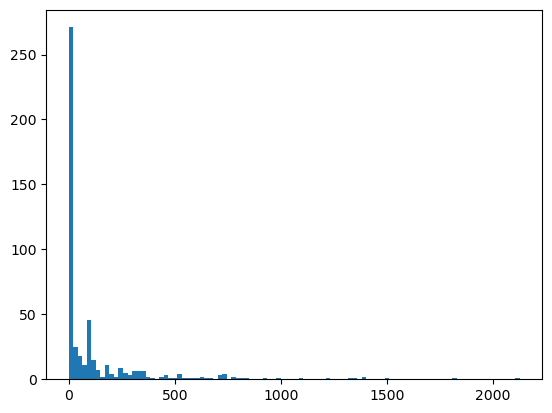

In [58]:
plt.hist(grouped_amountlow_class1_df['Amount'], bins=100)
plt.show()

We can observe that fruad transaction via credit cards occurs at very low range of amount around 100 dollars

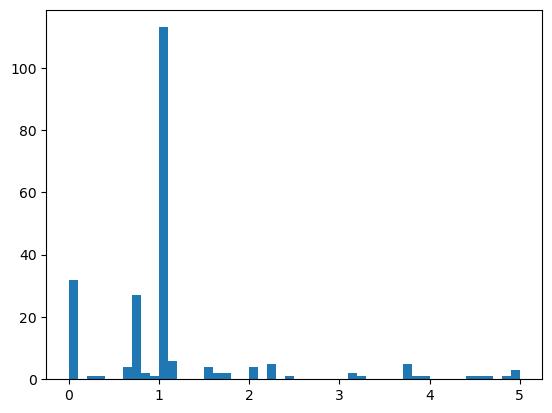

In [59]:
plt.hist(grouped_amountlow_class1_df['Amount'], range=(0,5), bins=50)
plt.show()

For fruadlent transaction mode of amount =1 dollar

In [60]:
grouped_amountlow_class0_df = grouped_amount_class_df.get_group(('0-2500', 0))

In [61]:
grouped_amountlow_class0_df.describe()

Time             V1             V2             V3  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean    94842.693002       0.019252       0.011278       0.020141   
std     47486.591102       1.896891       1.543058       1.438756   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54237.500000      -0.913512      -0.595753      -0.878702   
50%     84715.000000       0.023871       0.065687       0.184441   
75%    139340.000000       1.316972       0.801707       1.029929   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.012053       0.017056      -0.003995      -0.003225   
std         1.392545       1.279867       1.299465       1.076977   
min        -5.683171     -23.669726     -26.160506     -31.764946   
25%        -0.851194      -0.686058      -0.767394      -0.552336   
50%        -0.024309      -0.052033      -0.274552       0.039884   
75%         0.733815       0.613252       0.395629       0.568357   
max        16.491217      34.801666      16.614054      21.014587   

                  V8             V9            V10            V11  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.002065       0.005339       0.012705      -0.006953   
std         1.153434       1.088449       1.040267       1.002772   
min       -73.216718      -6.290730     -14.741096      -4.797473   
25%        -0.207385      -0.639440      -0.530921      -0.763604   
50%         0.022636      -0.049409      -0.090828      -0.035154   
75%         0.326947       0.598685       0.456700       0.735867   
max        18.709255      15.594995      23.745136      10.002190   

                 V12            V13            V14            V15  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.011214      -0.000310       0.011228      -0.000451   
std         0.945446       0.994830       0.896178       0.914423   
min       -15.144988      -5.791881     -18.392091      -4.391307   
25%        -0.401400      -0.648514      -0.422857      -0.583170   
50%         0.141938      -0.013859       0.051350       0.047831   
75%         0.619288       0.661984       0.492874       0.648318   
max         7.848392       4.569009      10.526766       5.825654   

                 V16            V17            V18            V19  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.006018       0.011570       0.003407       0.000122   
std         0.842411       0.749273       0.823714       0.810010   
min       -10.115560     -17.098444      -5.366660      -4.932733   
25%        -0.465782      -0.482640      -0.497319      -0.454861   
50%         0.066979      -0.064971      -0.002997       0.003967   
75%         0.522904       0.399787       0.500424       0.457997   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V21            V22            V23  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.007283      -0.003176       0.001888       0.002227   
std         0.684865       0.707172       0.719780       0.555094   
min       -23.646890     -34.830382      -8.593642     -36.666000   
25%        -0.211797      -0.228572      -0.541013      -0.161164   
50%        -0.062898      -0.030150       0.007580      -0.010958   
75%         0.131507       0.184764       0.528964       0.147489   
max        16.756448      22.614889      10.503090      22.083545   

                 V24            V25            V26            V27  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.000027       0.000876       0.000179      -0.000799   
std         0.605311       0.516503       0.481869       0.387242   
min     

In [62]:
grouped_amountlow_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
261280  159943.0  2.163494 -0.336664 -1.906380 -0.703691  0.458860 -0.398080   
211342  138372.0 -0.767432  0.476567  1.111652  0.020486  0.743512 -1.110682   
217710  140999.0  1.908244 -0.253388 -0.636269  0.697147 -0.511629 -1.067357   
26877    34292.0  1.217335  0.324264  0.744327  1.231296 -0.496372 -0.721462   
260225  159457.0  2.019981 -0.638661 -1.191509  0.552942 -0.232218 -0.268765   

              V7        V8        V9       V10       V11       V12       V13  \
261280 -0.025092 -0.164611  0.410724  0.274851 -0.227048  0.118436 -0.253724   
211342  0.607752 -0.093104 -0.322555 -0.582955 -1.000002 -1.150315 -1.764417   
217710 -0.014684 -0.282090  0.630966  0.043120 -0.347973  0.859817  0.694386   
26877  -0.055246 -0.128160  0.085789  0.021922 -0.337208  0.384645  0.400007   
260225 -0.243337 -0.235453 -0.529153  0.986776 -1.717556  0.109101  0.999467   

             V14       V15       V16       V17       V18       V19       V20  \
261280  0.597239  0.132125  0.690838 -1.113423  0.566256  0.773607 -0.147515   
211342  0.813564  1.430789 -0.644500  0.069728  0.419161  0.832493  0.047841   
217710  0.018243  0.203499 -0.115433 -0.268922 -0.684215 -0.364618 -0.103942   
26877   0.154896  1.061983  0.351472 -0.571377 -0.134536 -0.468953 -0.119291   
260225 -0.055656 -0.003588 -1.443432 -0.487747  1.277616 -1.002502 -0.482469   

             V21       V22       V23       V24       V25       V26       V27  \
261280  0.142163  0.473239 -0.100250 -1.288542  0.057834  1.473650 -0.146334   
211342  0.289765  0.712350 -0.519131 -0.006788  0.842093  0.211051  0.019526   
217710  0.029328  0.186751  0.226725  0.393112 -0.257350  0.199858 -0.039460   
26877  -0.076563 -0.183367  0.031533  0.371353  0.424930 -0.479499  0.036522   
260225 -0.283735 -0.277019  0.037125 -0.813935  0.095834 -0.551624  0.041701   

             V28  Amount  Class Amount_Group  
261280 -0.104812    6.05      0       0-2500  
211342  0.059124    1.00      0       0-2500  
217710 -0.040913   49.95      0       0-2500  
26877   0.031903    2.00      0       0-2500  
260225 -0.033974   75.00      0       0-2500

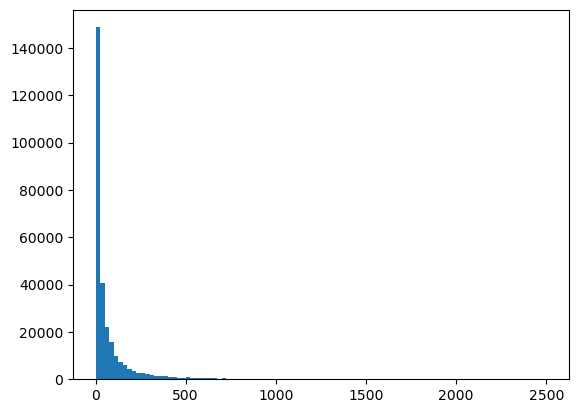

In [63]:
plt.hist(grouped_amountlow_class0_df['Amount'], bins=100)
plt.show()

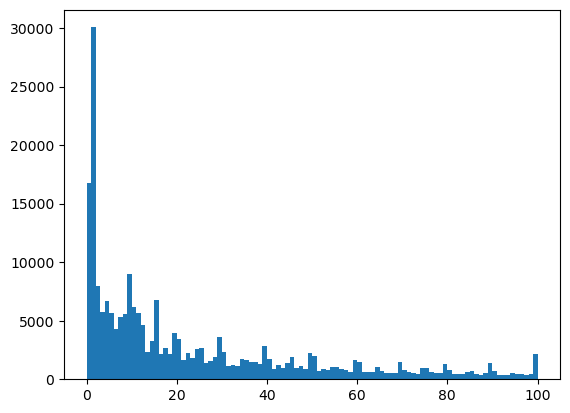

In [64]:
plt.hist(grouped_amountlow_class0_df['Amount'],range =(0,100),  bins=100)
plt.show()

Time
NF


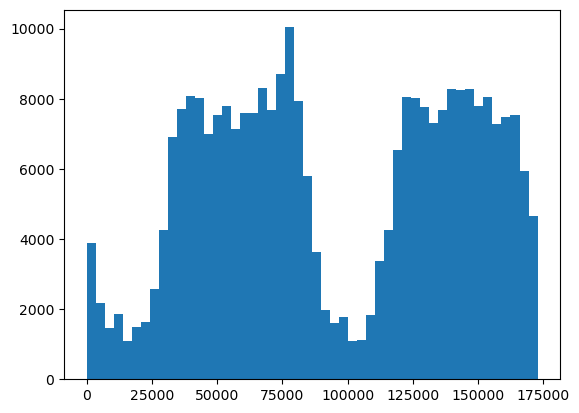

F


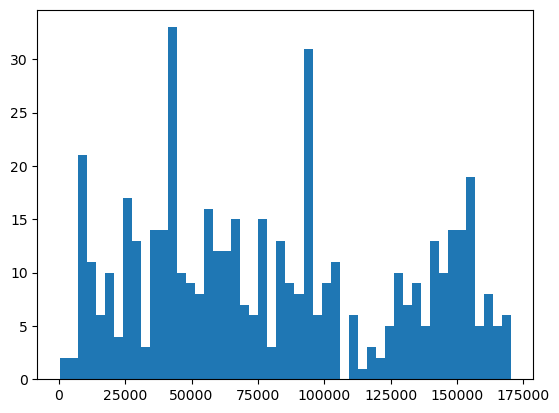

V1
NF


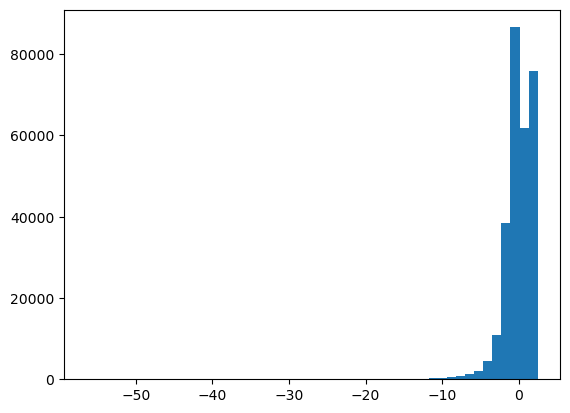

F


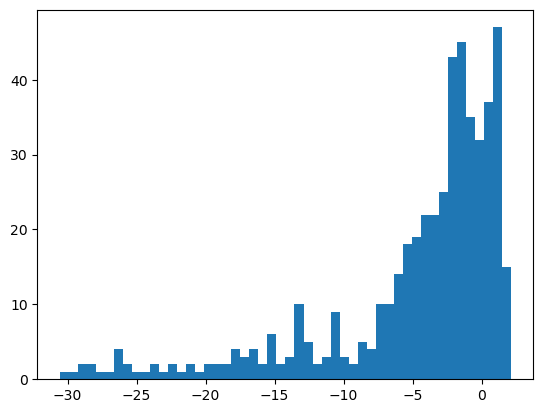

V2
NF


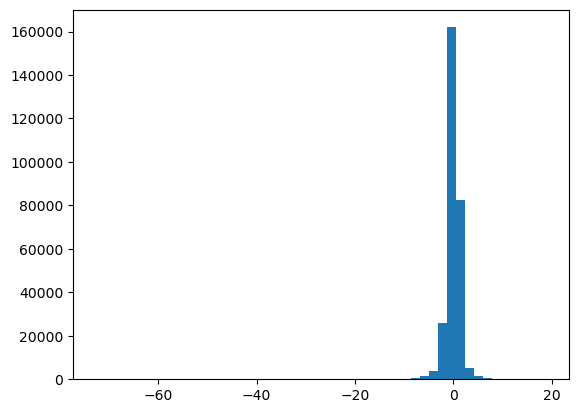

F


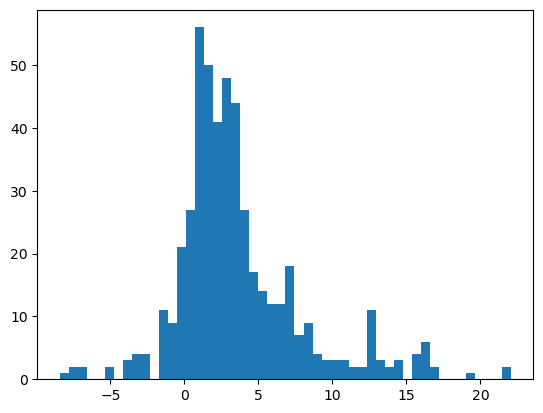

V3
NF


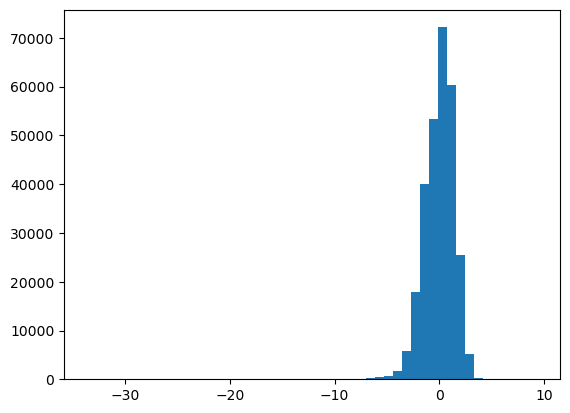

F


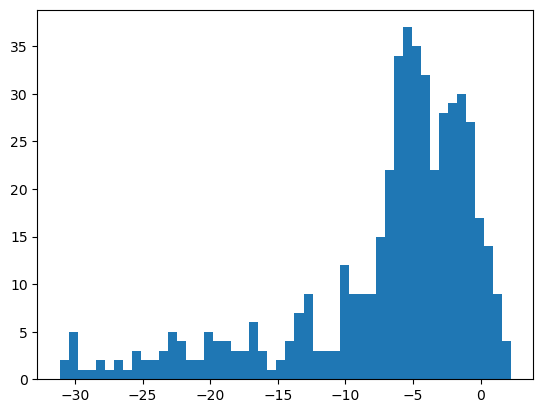

V4
NF


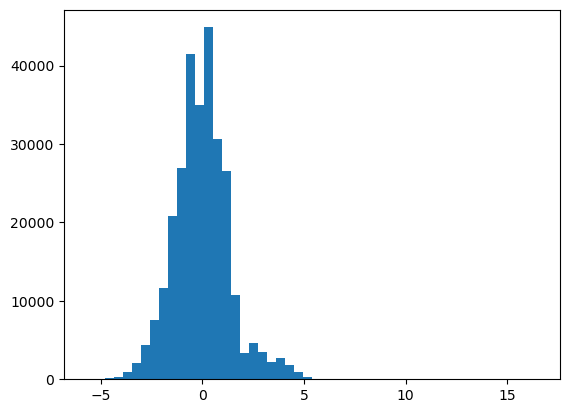

F


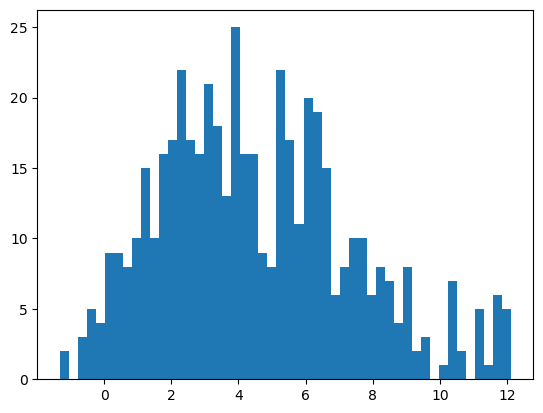

V5
NF


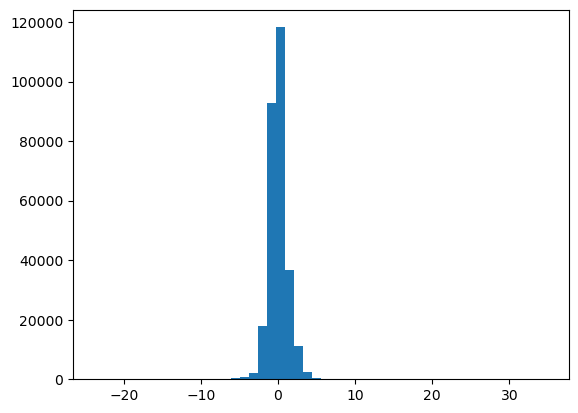

F


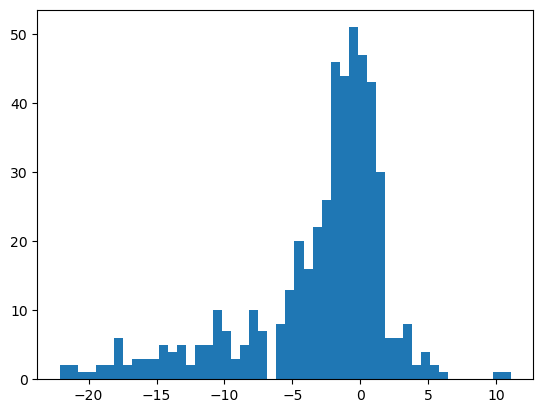

V6
NF


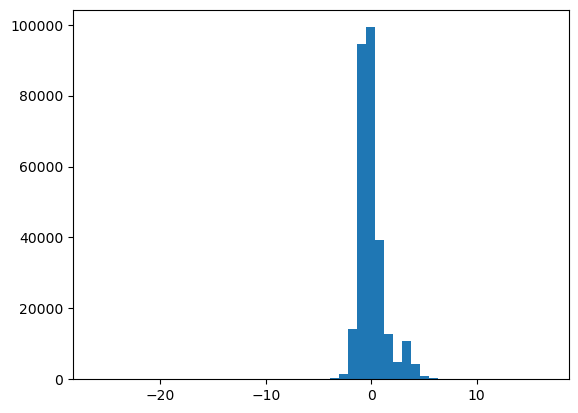

F


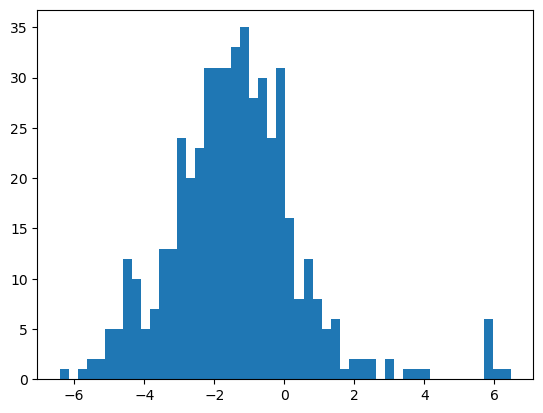

V7
NF


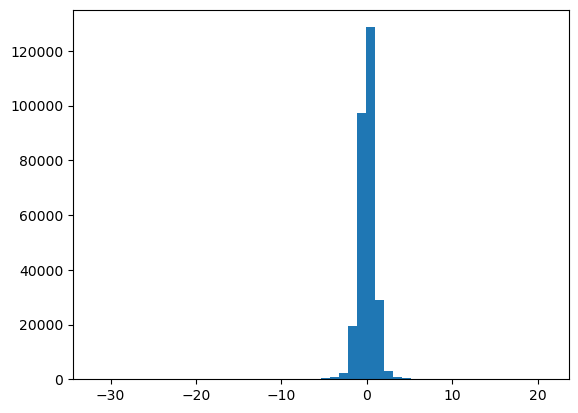

F


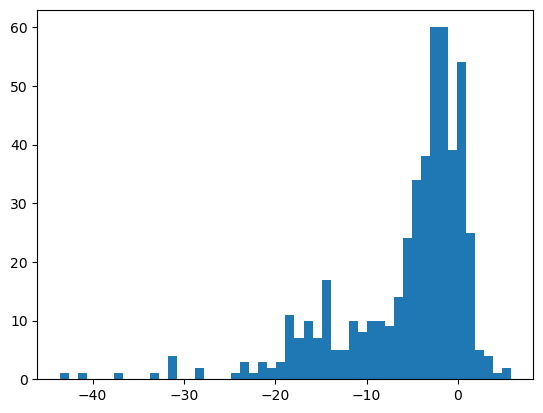

V8
NF


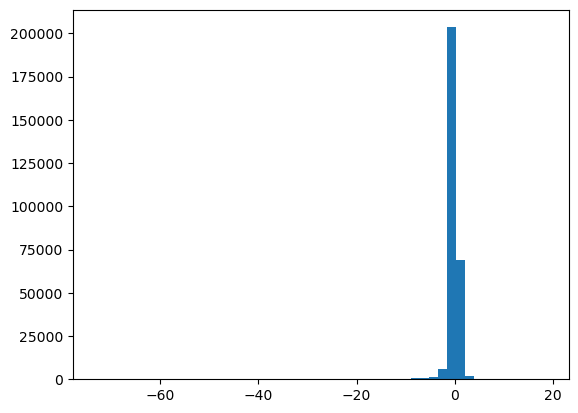

F


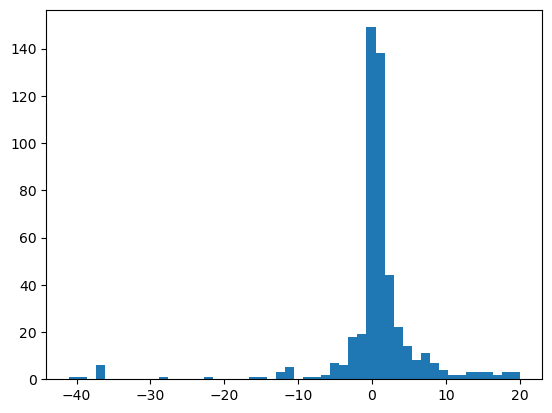

V9
NF


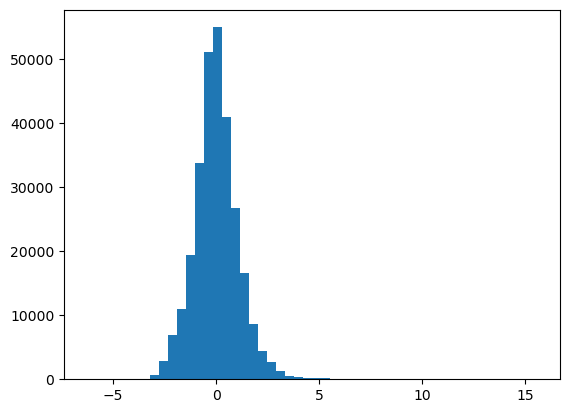

F


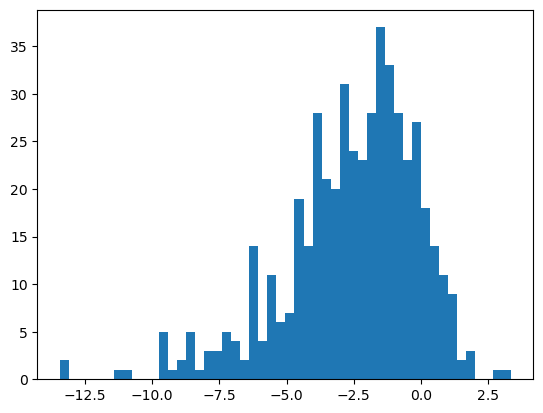

V10
NF


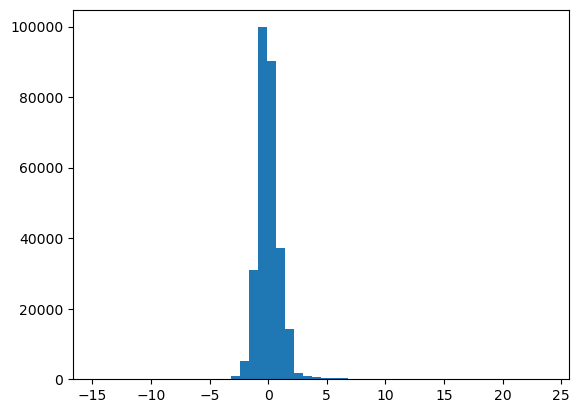

F


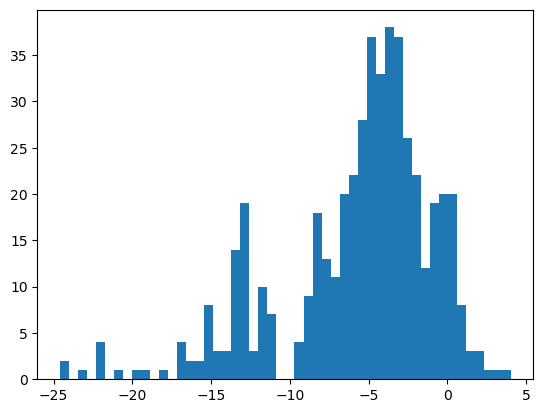

V11
NF


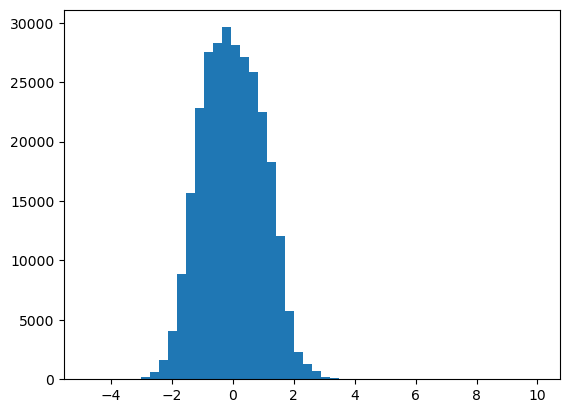

F


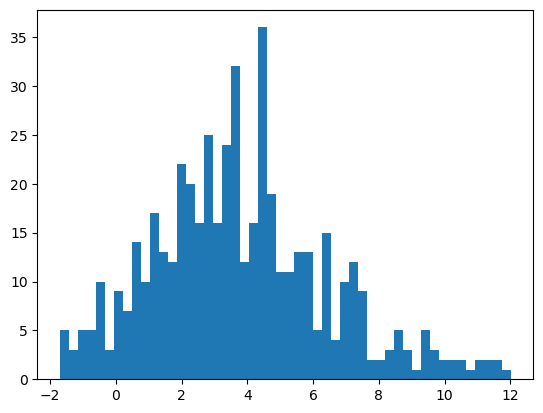

V12
NF


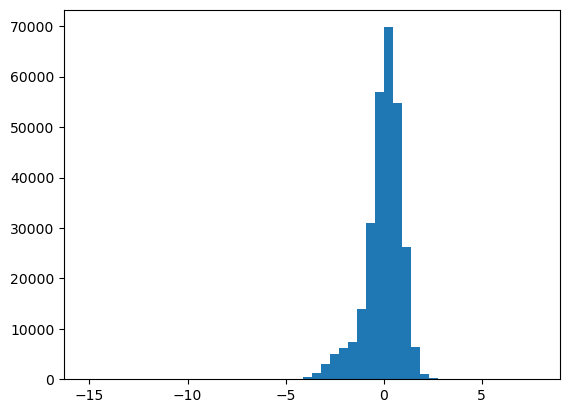

F


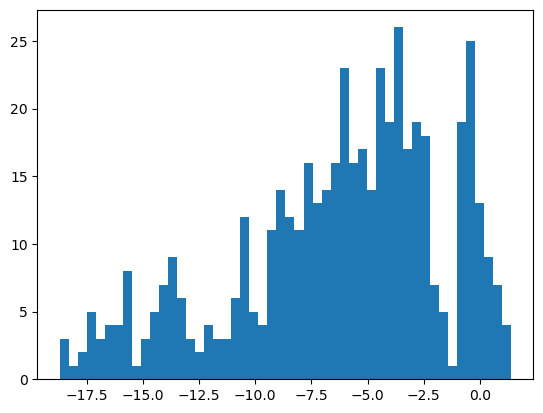

V13
NF


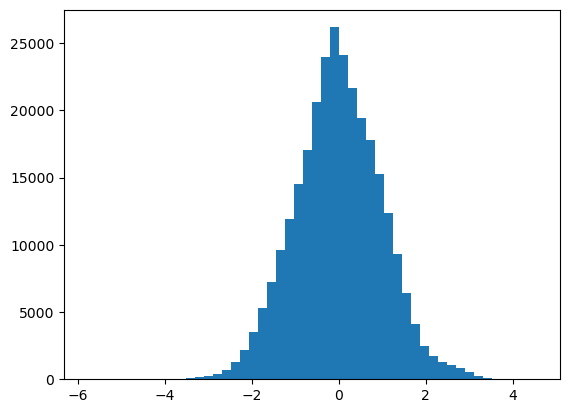

F


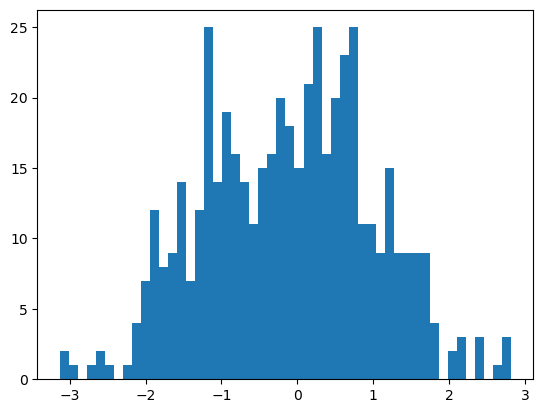

V14
NF


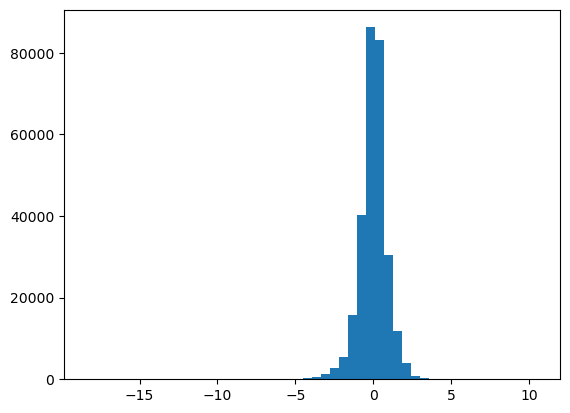

F


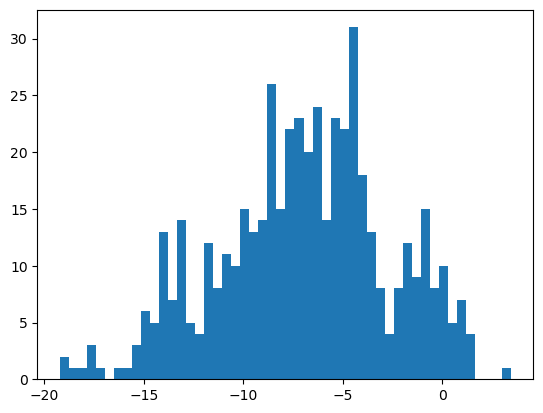

V15
NF


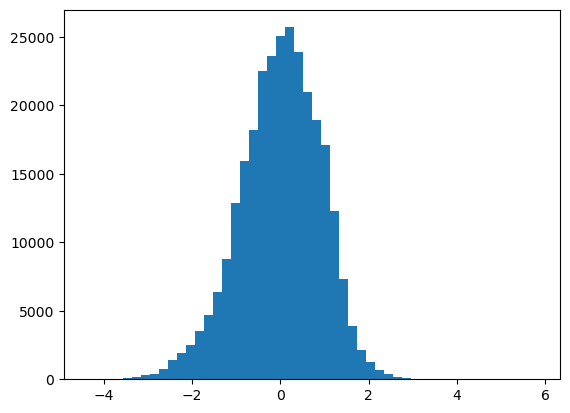

F


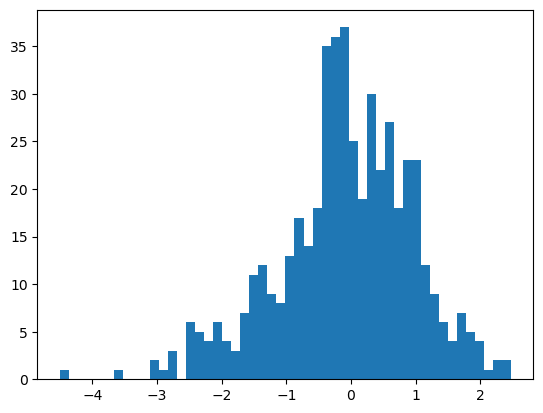

V16
NF


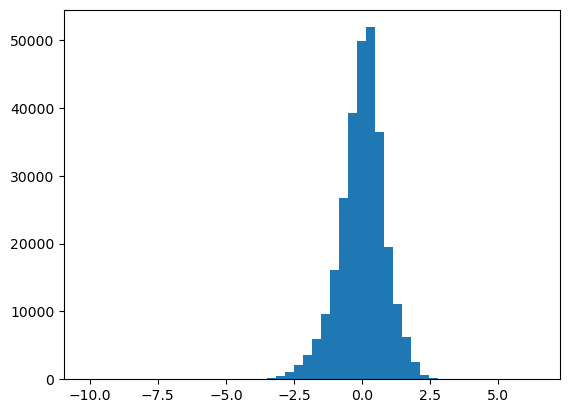

F


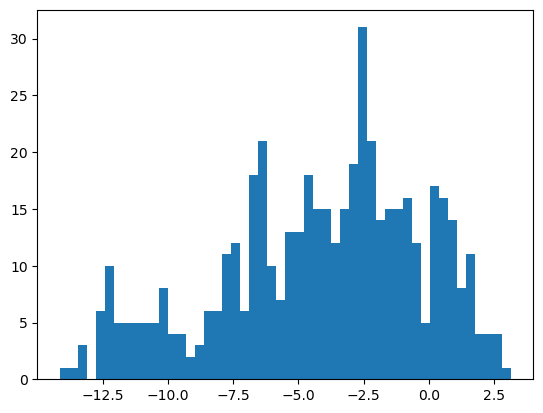

V17
NF


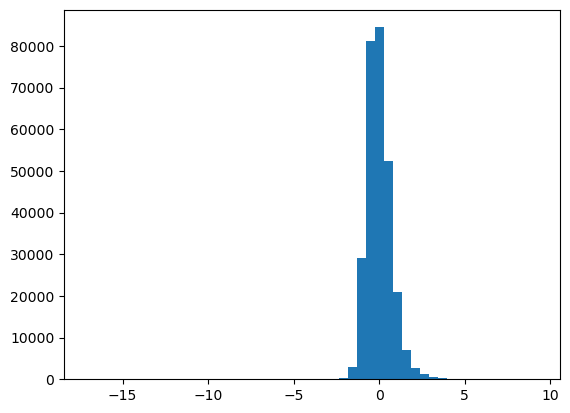

F


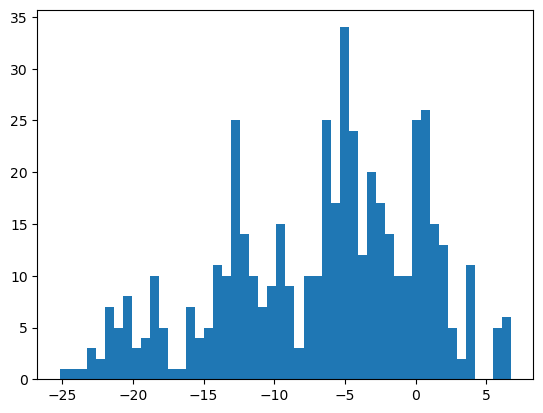

V18
NF


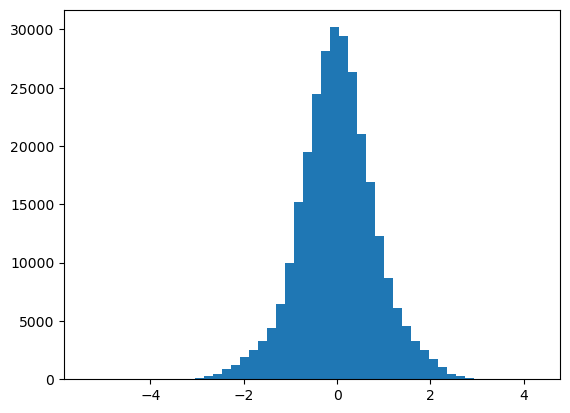

F


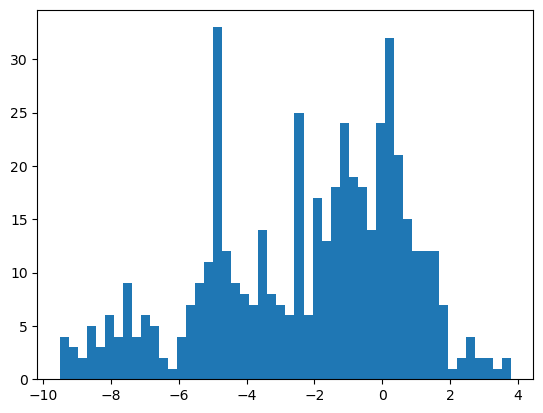

V19
NF


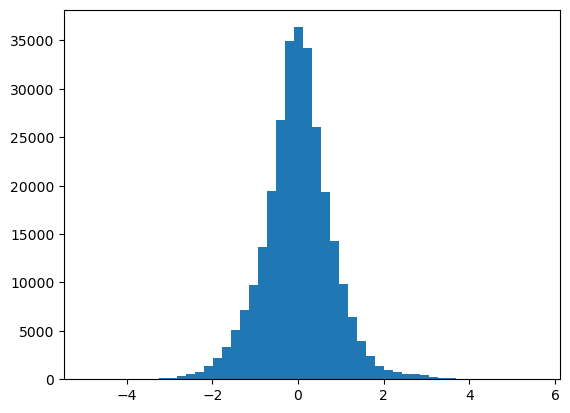

F


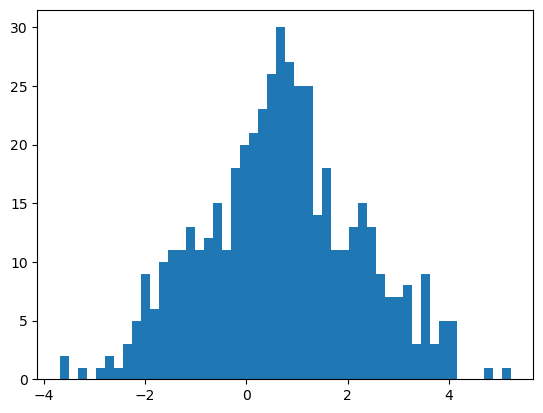

V20
NF


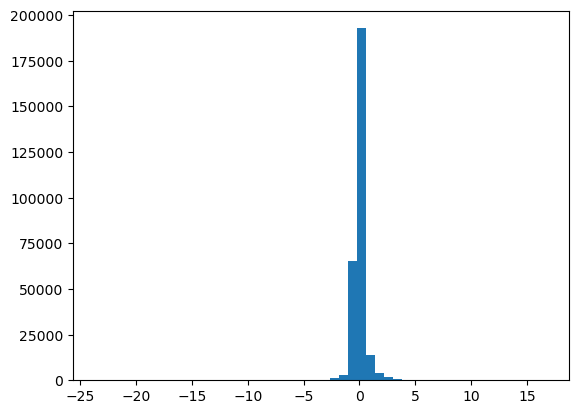

F


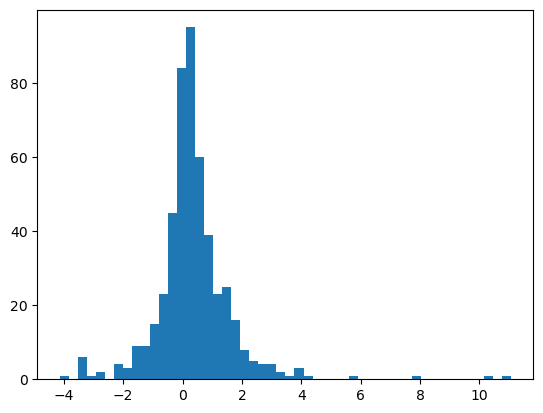

V21
NF


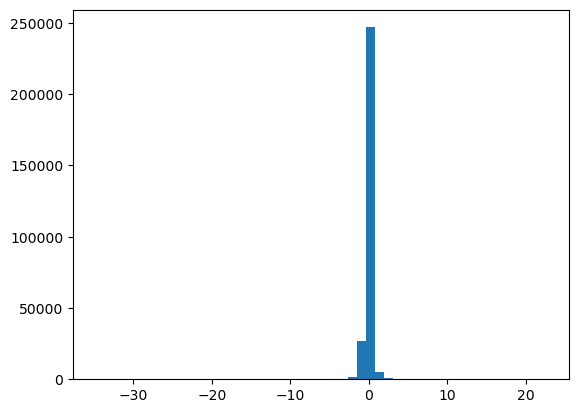

F


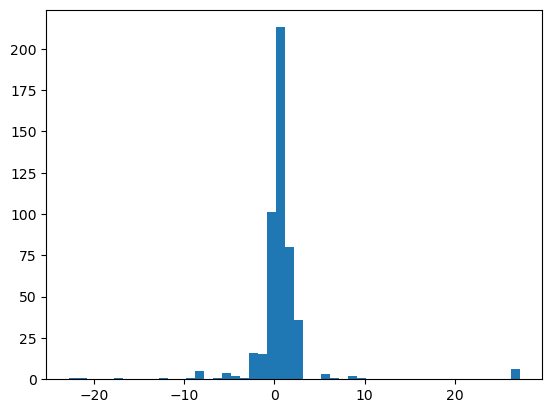

V22
NF


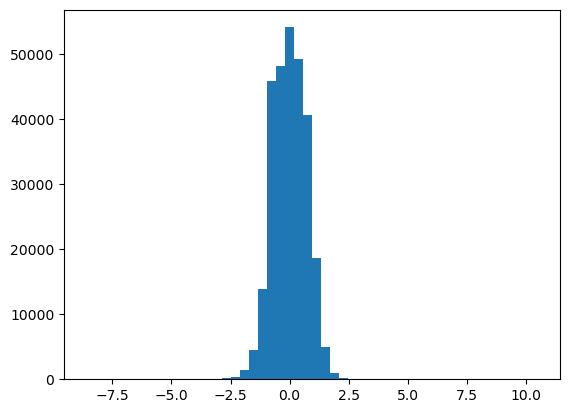

F


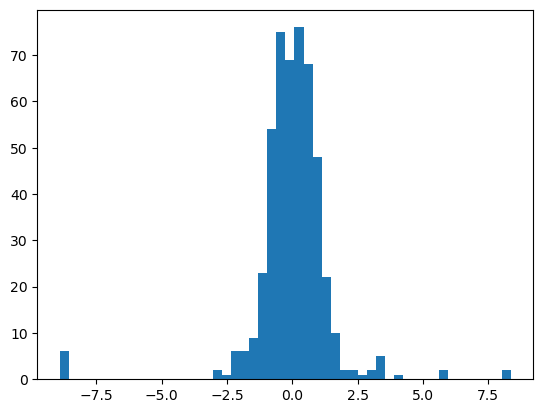

V23
NF


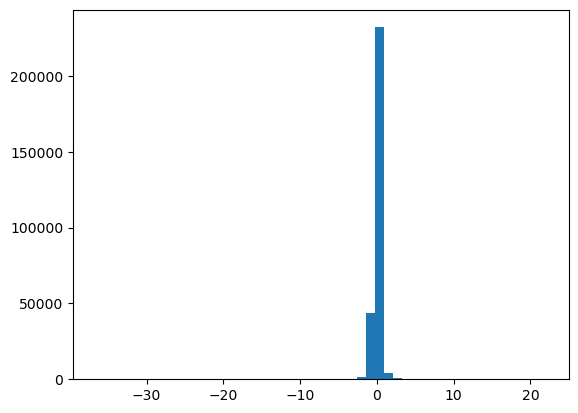

F


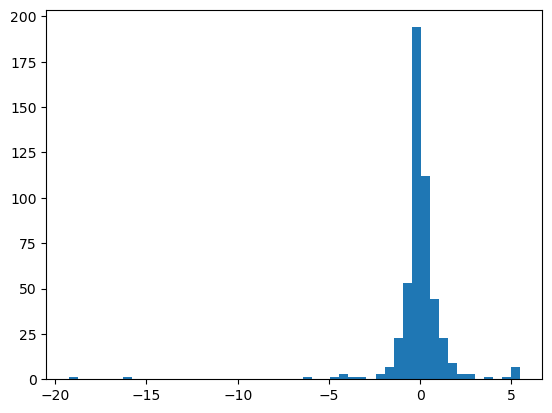

V24
NF


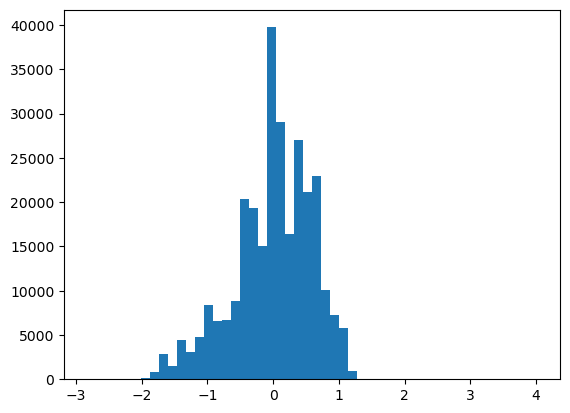

F


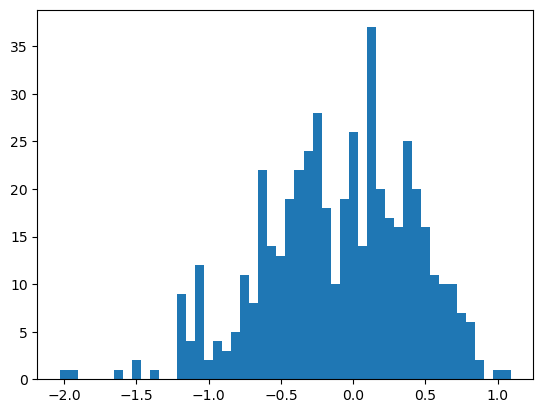

V25
NF


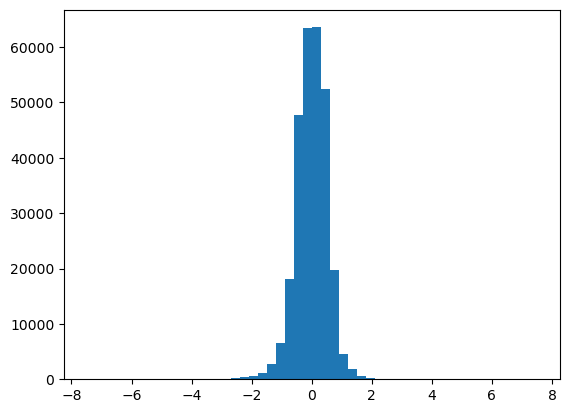

F


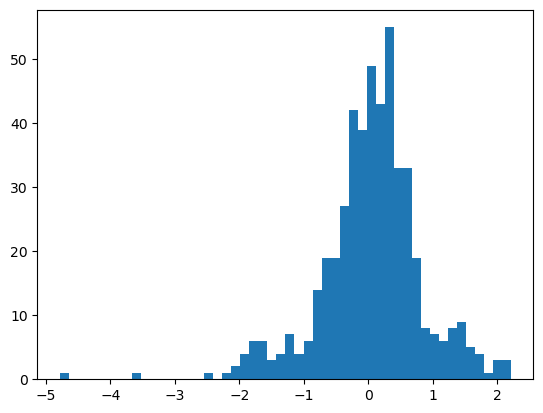

V26
NF


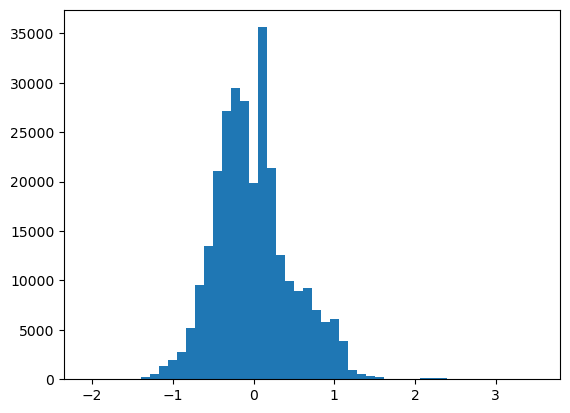

F


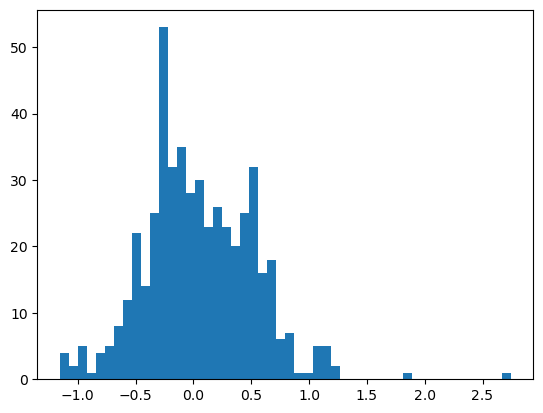

V27
NF


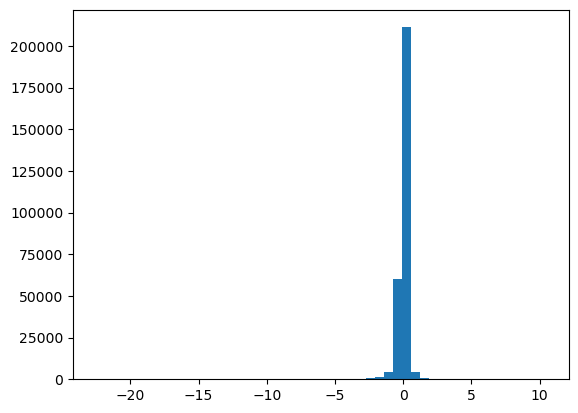

F


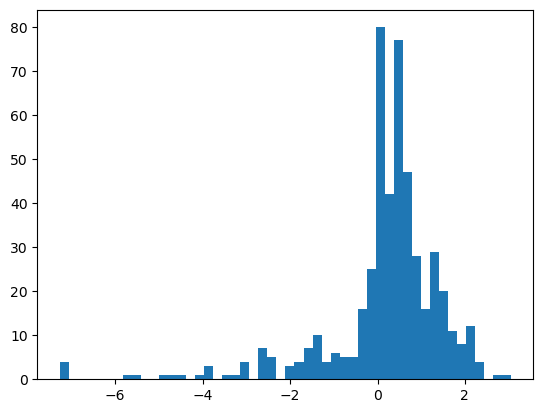

V28
NF


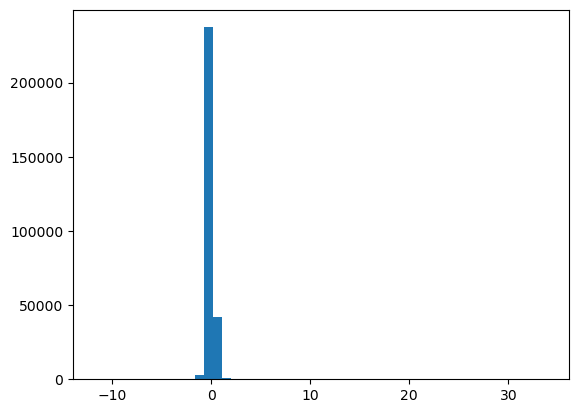

F


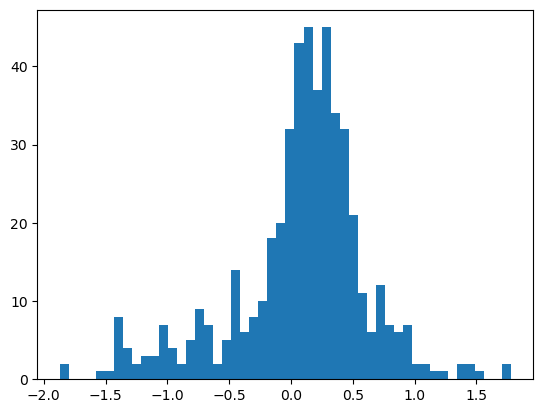

Amount
NF


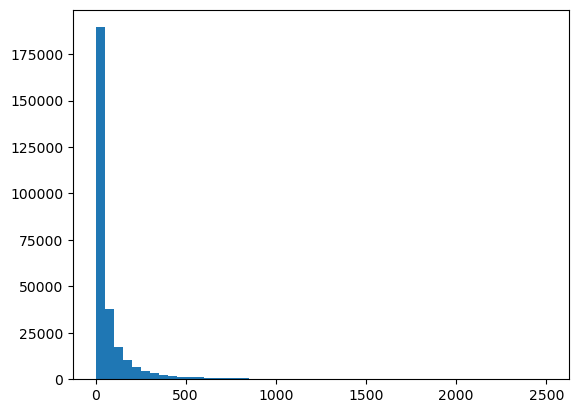

F


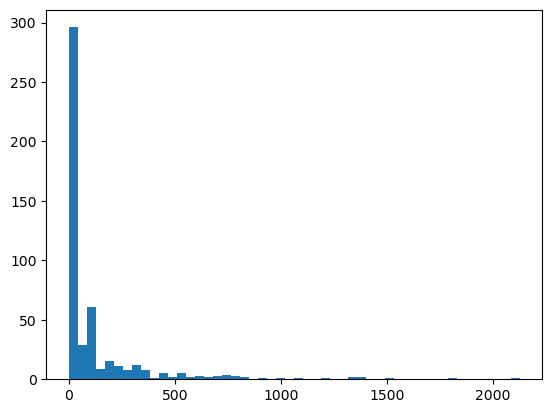

Class
NF


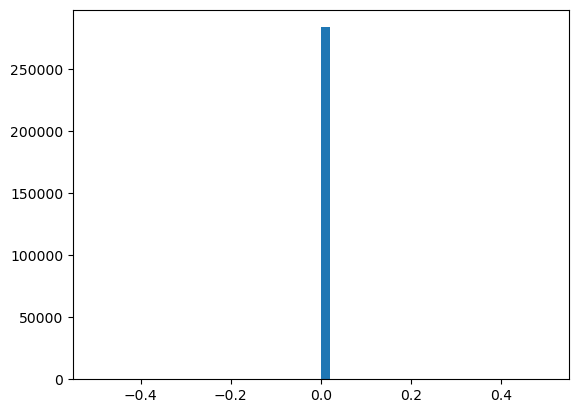

F


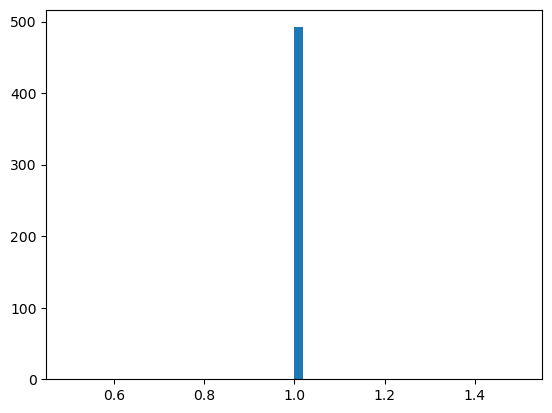

In [65]:
for x in col1:
    print(x)
    print('NF')
    plt.hist(grouped_amountlow_class0_df[x], bins=50)
    plt.show()
    print('F')
    plt.hist(grouped_amountlow_class1_df[x], bins=50)
    plt.show()

# Feature Selection

In [66]:
selected_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount',
       'Class']

In [67]:
X_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount']

In [68]:
grouped_amountlow_df[selected_col].head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V27  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412  0.133558   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.008983   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980 -0.055353   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038  0.062723   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542  0.219422   

        V28  Amount  Class  
0 -0.021053  149.62      0  
1  0.014724    2.69      0  
2 -0.059752  378.66      0  
3  0.061458  123.50      0  
4  0.215153   69.99      0

In [69]:
fin_df = grouped_amountlow_df[selected_col]

In [70]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)


In [71]:
for train_index, test_index in sss.split(fin_df, fin_df['Class']):
    train_df = fin_df.iloc[train_index]
    test_df = fin_df.iloc[test_index]

In [72]:
test_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
143034   85080.0  1.213392  0.236815  0.258125  0.652679 -0.271637 -0.626407   
275153  166396.0 -1.578974  0.692048 -1.419975 -3.825124 -0.455440 -0.311787   
145173   86690.0 -0.744072  0.781907  2.191534  4.494003 -0.745888  1.246782   
31292    36306.0  1.084003 -0.187544  1.065771  1.644145 -0.522436  0.815413   
243468  151944.0  1.979337  0.064521 -1.150544  1.176325  0.060850 -0.815770   

              V7        V8        V9       V10       V11       V12       V13  \
143034 -0.058028 -0.009545  0.176873 -0.297845 -0.011721 -0.199855 -0.771613   
275153 -0.080435  1.068653 -0.626802 -1.861700 -0.565082  1.221731  0.862313   
145173  0.966185  0.156802 -1.902251  1.053488 -1.266732 -1.400184 -0.454671   
31292  -0.511514  0.292066  1.240648 -0.427920 -1.390365  0.983680  0.023061   
243468  0.116726 -0.135087  0.133827  0.528709  0.836736  0.349392 -1.126740   

             V14       V15       V16       V17       V18       V19       V20  \
143034 -0.064725  1.453087  0.231905  0.328907 -0.628232 -0.549979 -0.176157   
275153  1.240801  1.203561 -3.510263  1.470899 -0.092419 -0.941383 -0.994582   
145173  0.166542  1.426211  0.372372 -0.026232  0.835472  0.929175  0.727085   
31292  -0.806429 -1.700719 -1.050834  0.631131 -1.261841  0.305015 -0.160482   
243468  0.918992 -0.019397  0.124725 -0.724189  0.501749 -0.421084 -0.341513   

             V27       V28  Amount  Class  
143034 -0.012887  0.025224    1.29      0  
275153 -0.366108 -0.107610   59.94      0  
145173  0.030283  0.112806  250.93      0  
31292   0.090229  0.027510   21.64      0  
243468 -0.004149 -0.064232    1.00      0

In [73]:
train_df['Class'].describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [74]:
test_df['Class'].describe()

count    71092.000000
mean         0.001730
std          0.041559
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

*Smote*

In [75]:
X_train_df = train_df[X_col]
y_train_df = train_df['Class']

In [76]:
X_test_df = test_df[X_col]
y_test_df = test_df['Class']

In [77]:
y_train_df.describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [78]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_df, y_train_df)


In [79]:
X_train_smote.describe()

Time             V1             V2             V3  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean    87237.941835      -2.520689       1.970270      -3.723929   
std     48074.995388       5.417942       3.669960       6.169961   
min         0.000000     -56.407510     -72.715728     -31.813586   
25%     45234.758590      -3.137000      -0.087422      -5.342042   
50%     79959.000000      -0.833267       1.008685      -1.563862   
75%    133450.250000       0.804540       2.943586       0.283146   
max    172792.000000       2.451888      22.057729       4.226108   

                  V4             V5             V6             V7  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        2.348526      -1.650713      -0.696495      -3.060728   
std         3.177357       4.087341       1.719308       5.913750   
min        -5.683171     -22.245025     -26.160506     -43.557242   
25%        -0.057885      -1.907682      -1.534383      -3.388961   
50%         1.475375      -0.455436      -0.681959      -0.766118   
75%         4.333000       0.416290       0.027029       0.184422   
max        16.491217      34.801666      16.614054      21.014587   

                  V8             V9            V10            V11  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        0.101501      -1.352998      -2.983305       2.002778   
std         5.301499       2.272895       4.546540       2.786644   
min       -73.216718     -13.434066     -24.588262      -4.682931   
25%        -0.213552      -2.342755      -4.738453      -0.113414   
50%         0.159141      -0.804186      -1.059005       1.222792   
75%         0.852059       0.076818      -0.039891       3.672128   
max        19.587773      10.392889      15.331742      12.018913   

                 V12            V13            V14            V15  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -3.247461      -0.048734      -3.631209      -0.039389   
std         4.582216       1.003234       4.614678       0.906737   
min       -18.431131      -5.791881     -19.214325      -4.498945   
25%        -5.545554      -0.735752      -6.920343      -0.532620   
50%        -1.169670      -0.019510      -1.337887      -0.006752   
75%         0.166652       0.615942       0.076095       0.580672   
max         7.848392       4.569009      10.526766       5.825654   

                 V16            V17            V18            V19  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -2.158862      -3.471880      -1.163011       0.354763   
std         3.399461       5.803300       2.316223       1.163805   
min       -14.129855     -25.162799      -9.498746      -4.932733   
25%        -3.738360      -5.846977      -1.930636      -0.353513   
50%        -0.771607      -0.640909      -0.414814       0.230412   
75%         0.208543       0.147220       0.296747       0.960764   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V27            V28         Amount  
count  425812.000000  425812.000000  425812.000000  425812.000000  
mean        0.197865       0.078293       0.037735      93.942278  
std         1.063994       0.988559       0.421310     188.934347  
min       -23.646890      -9.895244      -8.478686       0.000000  
25%        -0.188635      -0.067306      -0.059633       3.532143  
50%         0.042690       0.059883       0.034762      25.000000  
75%         0.458652       0.436043       0.207250      99.990000  
max        16.756448      10.507884      33.847808    2500.000000

In [80]:
y_train_smote.describe()

count    425812.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

# Logistic Regression

In [81]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=10000)

In [82]:
predictions = model.predict(X_test_df)
print(classification_report(y_test_df, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70969
           1       0.07      0.89      0.14       123

    accuracy                           0.98     71092
   macro avg       0.54      0.93      0.56     71092
weighted avg       1.00      0.98      0.99     71092



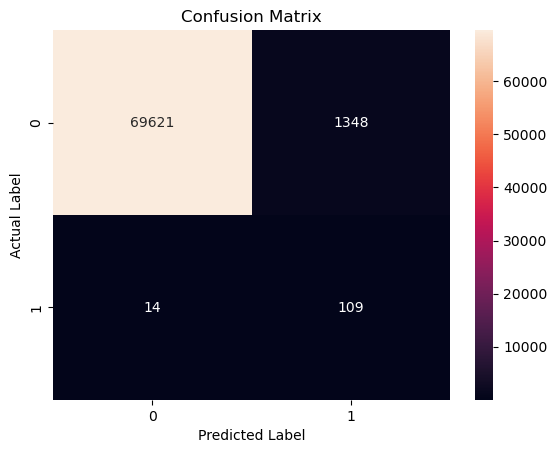

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70969
           1       0.07      0.89      0.14       123

    accuracy                           0.98     71092
   macro avg       0.54      0.93      0.56     71092
weighted avg       1.00      0.98      0.99     71092

AUROC Score: 0.9641274725813527


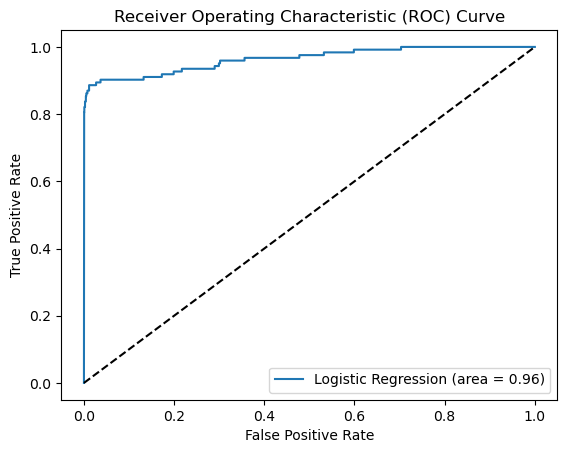

In [83]:

# Predictions
predictions = model.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
